In [1]:
import pandas as pd 
data = pd.read_csv('/workspaces/codespaces-jupyter/data/Sheet 2-tobacco.csv')
data.shape

(36, 45)

In [2]:
data.isnull().sum()

State/UT                                                                                                                                 0
Area                                                                                                                                     0
Ever tobacco users (%)                                                                                                                   0
Current tobacco users (%)                                                                                                                0
Ever cigarette users (%)                                                                                                                 0
Current cigarette users (%)                                                                                                              0
Ever smokeless tobacco users (%)                                                                                                         0
Current smokeless tobacco u

In [3]:
categorical_variables = ['State/UT']
# This is a list of all pollutants
pollutants_list = ['State/UT', 'Area', 'Ever tobacco users (%)',
       'Current tobacco users (%)', 'Ever tobacco smokers (%)',
       'Current tobacco smokers (%)', 'Ever cigarette users (%)',
       'Current cigarette users (%)', 'Ever bidi users (%) ',
       'Current bidi users (%)', 'Ever smokeless tobacco users (%)',
       'Current smokeless tobacco users (%)',
       'Ever users of  paan masala together with tobacco (%)',
       'Never cigarette smokers susceptible to cigarette use in future (%)',
       'Median age of initiation of Cigarette (in years)',
       'Median age of initiation of Bidi (in years)',
       'Median age of initiation of smokeless tobacco (in years)',
       'Awareness about e-cigarette (%)', 'Ever e-cigarette use (%)',
       'Ever tobacco smokers who quit in last 12 months (%)',
       'Current tobacco smokers who tried to quit smoking in the past 12 months (%)',
       'Current tobacco smokers who wanted to quit smoking now   (%)',
       'Ever  smokeless tobacco users who quit  in last 12 months (%)',
       'Current smokeless tobacco users who tried to quit tobacco in the past 12 months   (%)',
       'Current  smokeless tobacco users who wanted to quit tobacco now     (%)',
       'Exposure to tobacco smoke at home/public place (%)',
       'Exposure to tobacco smoke at home   (%)',
       'Exposure to tobacco smoke inside any enclosed public  places  (%)',
       'Exposure to tobacco smoke at any outdoor public places  (%)',
       'Students who saw anyone smoking inside the  school building or outside school property (%)',
       'Major source of tobacco product- Cigarette: Store   (%)',
       'Major source of tobacco product- Cigarette: Paan shop (%)',
       'Major source of tobacco product- Bidi: Store   (%)',
       'Major source of tobacco product- Bidi: Paan shop (%)',
       'Major source of tobacco product- Smokeless tobacco: Store   (%)',
       'Major source of tobacco product- Smokeless tobacco: Paan shop  (%)',
       'Current cigarette smokers who bought cigarettes from a store, paan shop, street vendor, or vending machine       (%)',
       'Current bidi smokers who bought bidi from a store, paan shop, or street vendor (%)',
       'Refused sale of cigarette because of age in past 30 days   (%)',
       'Refused sale of bidi because of age in past 30 days   (%)',
       'Refused sale of smokeless tobacco because of age in past 30 days    (%)',
       'Bought Cigarette as individual sticks in past 30 days    (%)',
       'Bought Bidi as individual sticks in past 30 days     (%)',
       'Students who noticed anti-tobacco messages anywhere in past 30 days    (%)',
       'Students who noticed anti-tobacco messages in mass media in past 30 days    (%)',
       'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)',
       'Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)',
       'Students who saw tobacco advertisements anywhere in past 30 days  (%)',
       'Students who saw anyone using tobacco on mass media in past 30 days  (%)',
       'Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%)',
       'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)',
       'Students who thought it is difficult to quit once someone starts smoking tobacco (%)',
       'Students who thought other people’s tobacco smoking is harmful to them (%)',
       'Students who favoured ban on smoking inside enclosed public places (%)',
       'Students who favoured ban on smoking at outdoor public places (%)',
       'School heads aware of COTPA, 2003  (%)',
       'Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003  (%)',
       'Schools followed ‘tobacco-free school’ guidelines  (%)',
       'Schools aware of the policy for displaying ‘tobacco-free school’ board  (%)']

import matplotlib.pyplot as plt

def create_histogram_plot(df, bins, station, pollutant):
    '''Creates a histogram plot.
    
    Args:
        df (pd.core.frame.DataFrame): The dataframe with the data.
        bins (int): number of bins for the histogram.
        station (str): The name of the station.
        pollutant (str): The name of the pollutant.
    '''
    data = df[df['State/UT'] == station]
    x = data[pollutant].values 
    try:
        plt.figure(figsize=(12, 6))
        plt.xlabel(f'{pollutant} concentration')
        plt.ylabel('Number of measurements')
        plt.hist(x, bins=bins)
        plt.title(f'Pollutant: {pollutant} - Station: {station}')
        plt.show()
    except ValueError:
        print('Histogram cannot be shown for selected values as there is no data')

# Example usage:

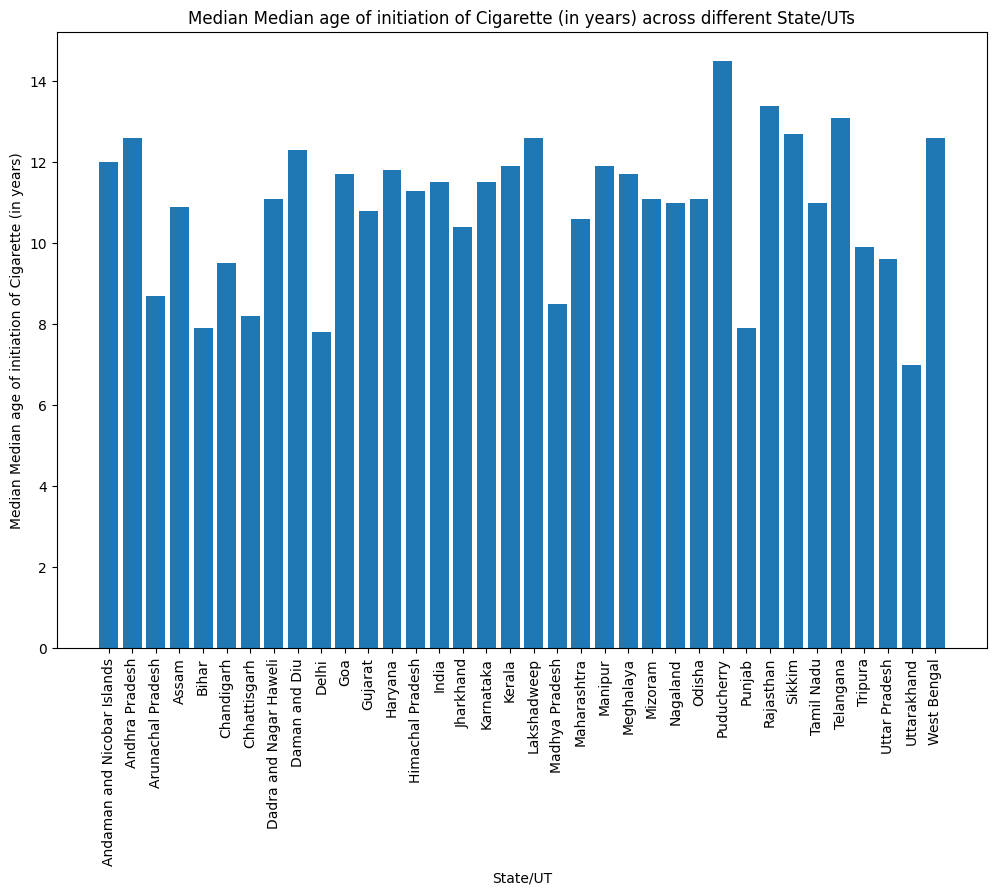

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def create_bar_plot(df, pollutant):
    '''Creates a bar plot to compare the given pollutant across different states/UTs.
    
    Args:
        df (pd.core.frame.DataFrame): The dataframe with the data.
        pollutant (str): The name of the pollutant.
    '''
    # Replace non-numeric values with NaN
    df[pollutant] = pd.to_numeric(df[pollutant], errors='coerce')
    
    # Filter out rows where the pollutant is not available
    filtered_df = df.dropna(subset=[pollutant])
    
    # Group the data by 'State/UT' and calculate the median for the pollutant
    grouped_df = filtered_df.groupby('State/UT')[pollutant].median().reset_index()
    
    # Sort the data by the median values
    # sorted_df = grouped_df.sort_values(by=pollutant)
    
    # Create the bar plot
    plt.figure(figsize=(12, 8))
    plt.bar(grouped_df['State/UT'], grouped_df[pollutant])
    plt.xlabel('State/UT')
    plt.ylabel(f'Median {pollutant}')
    plt.title(f'Median {pollutant} across different State/UTs')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

# Example usage:
create_bar_plot(data, 'Median age of initiation of Cigarette (in years)')


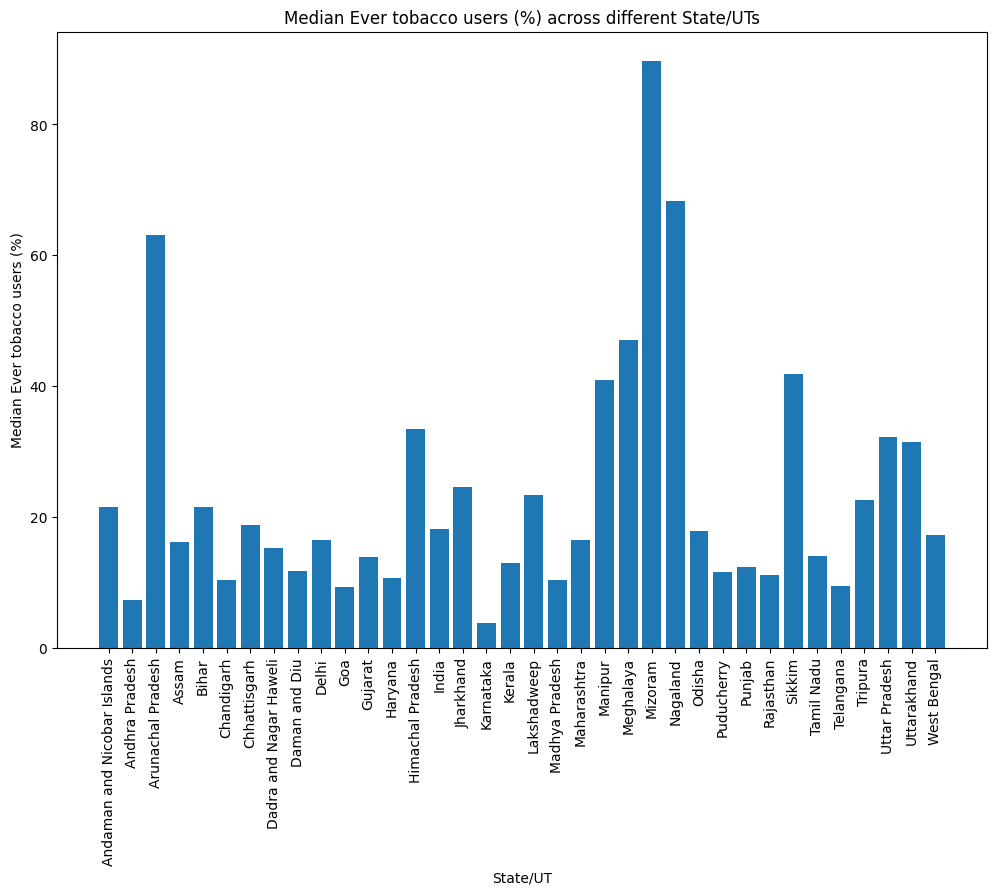

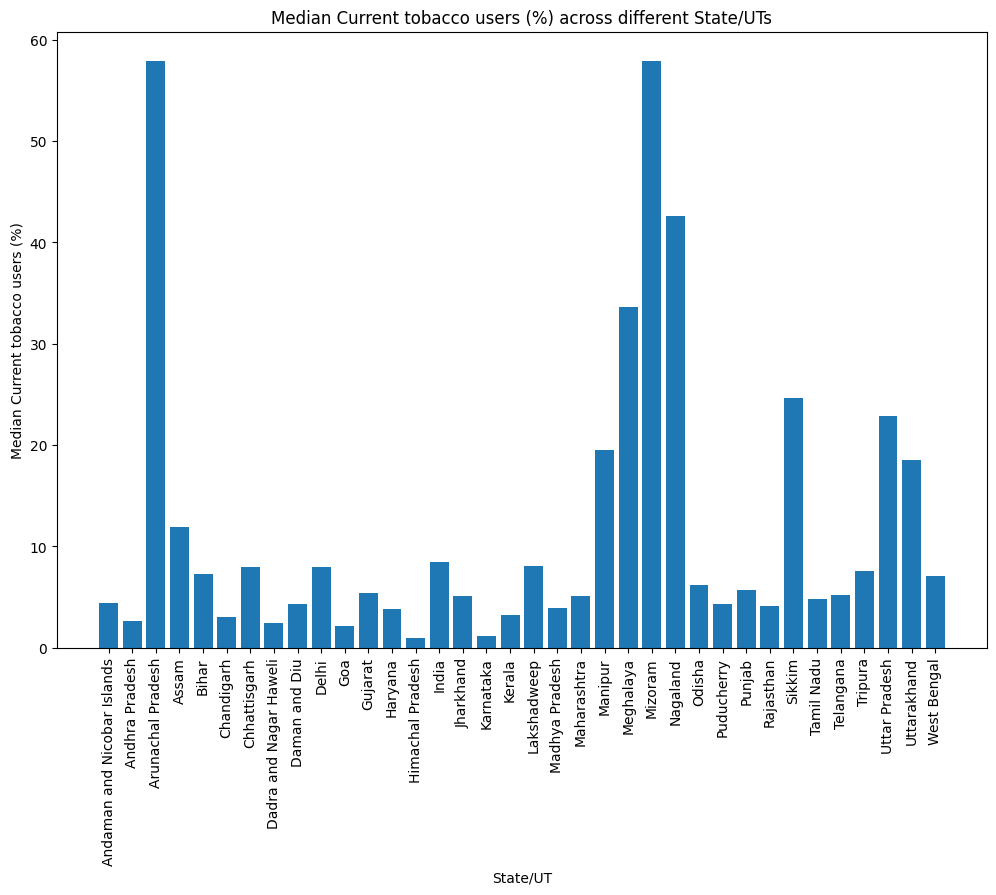

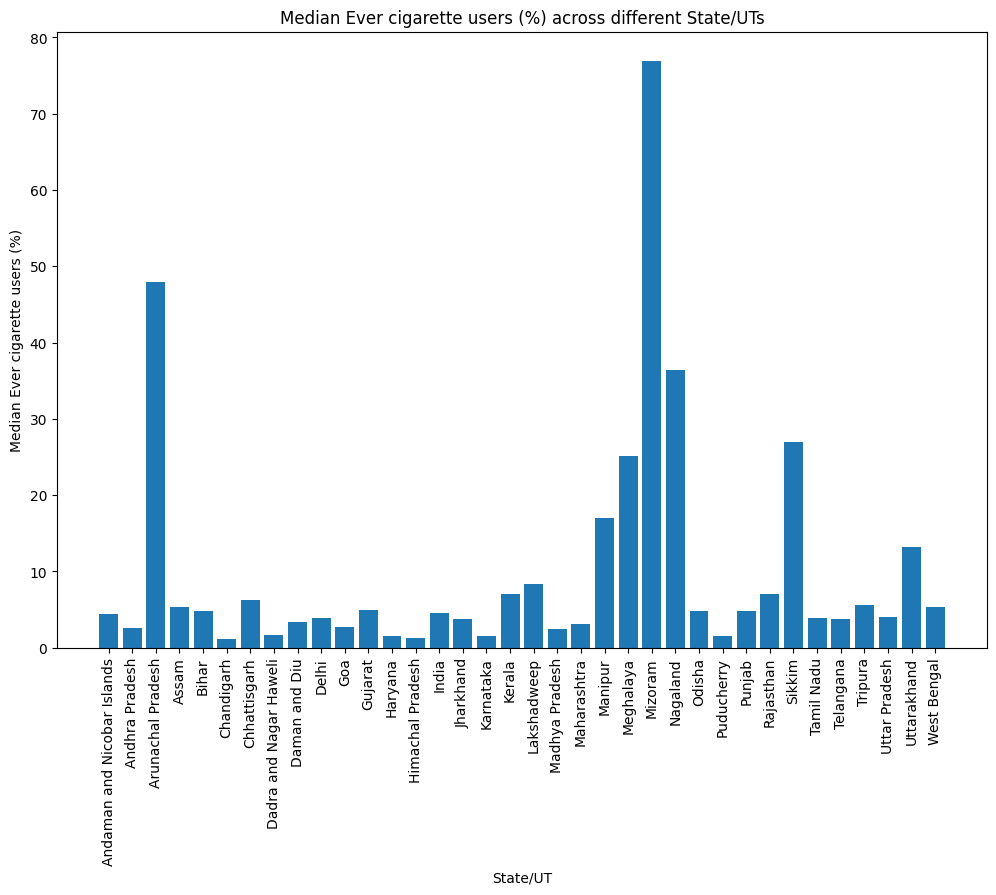

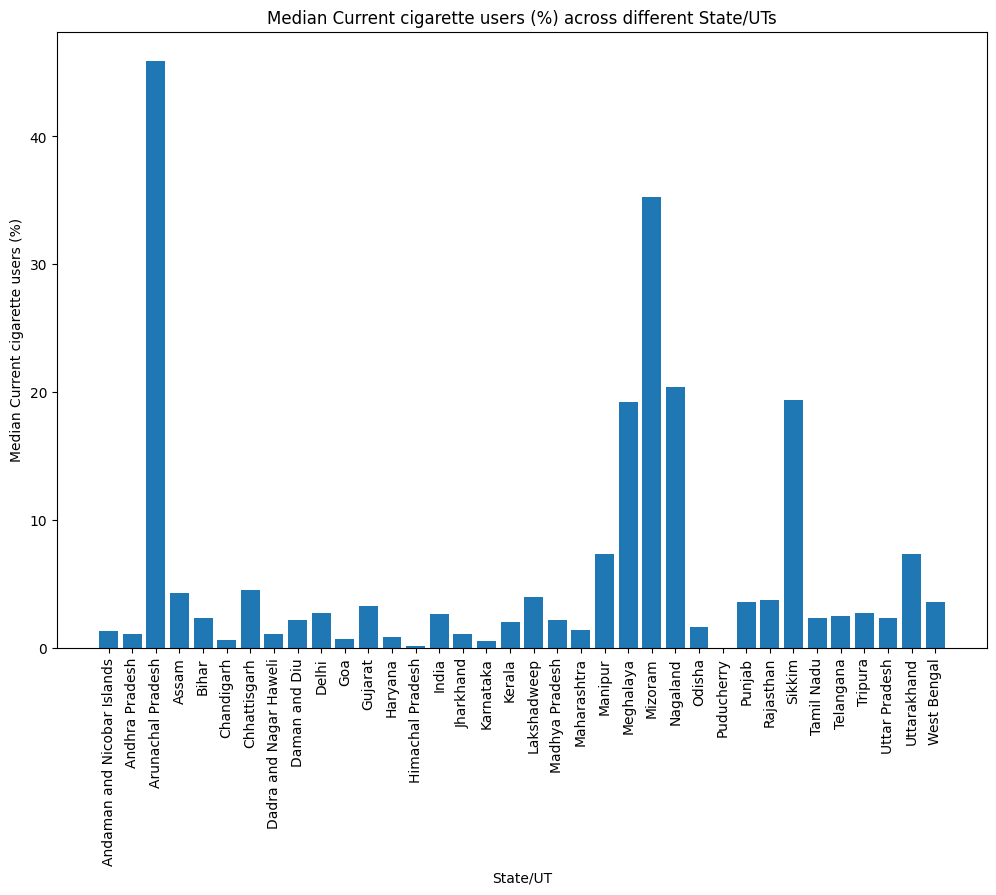

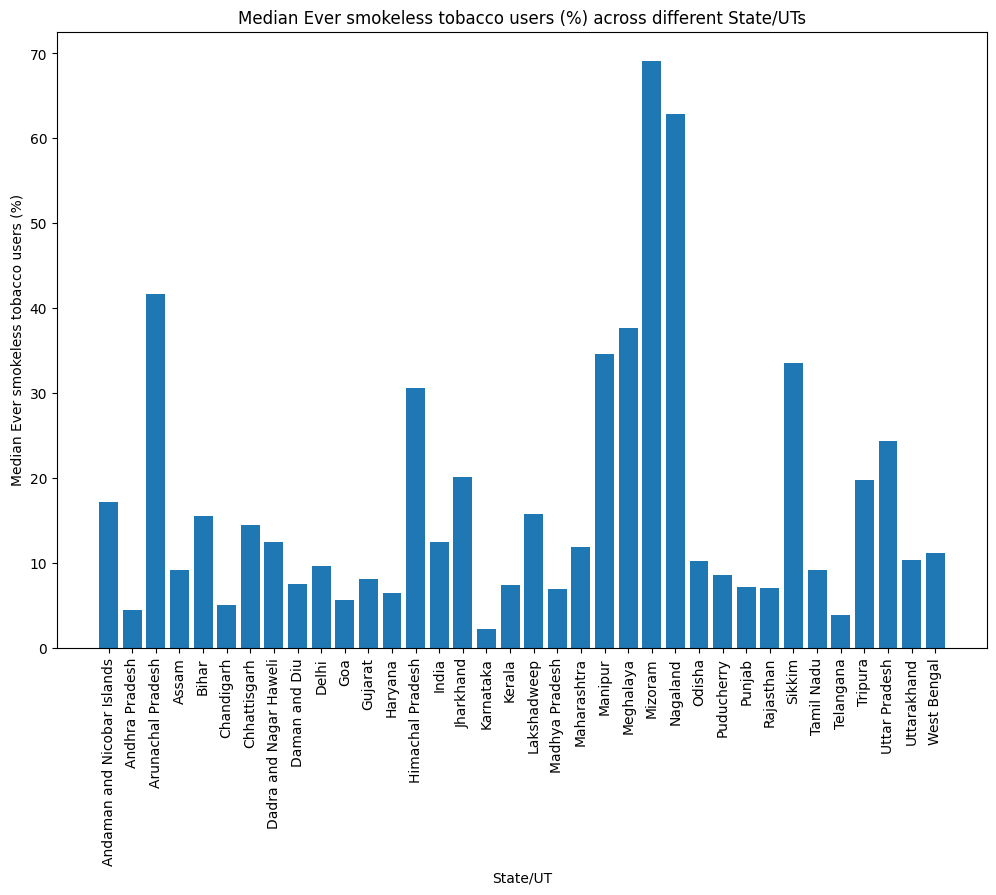

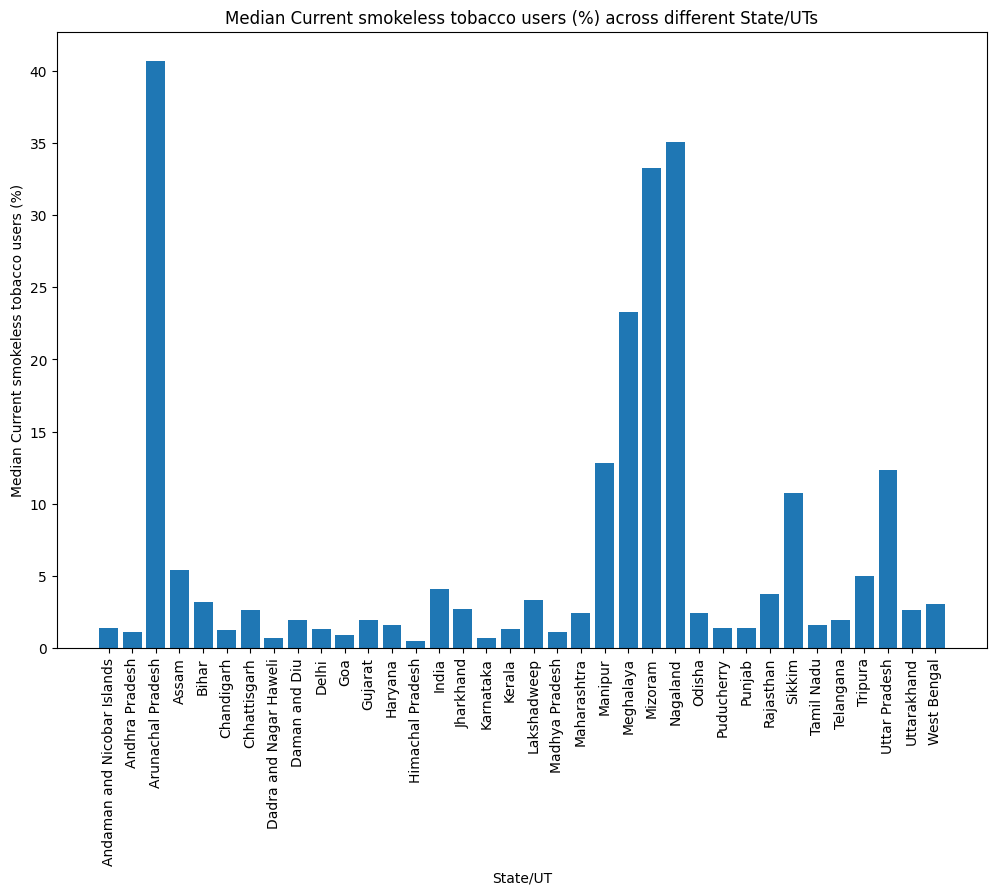

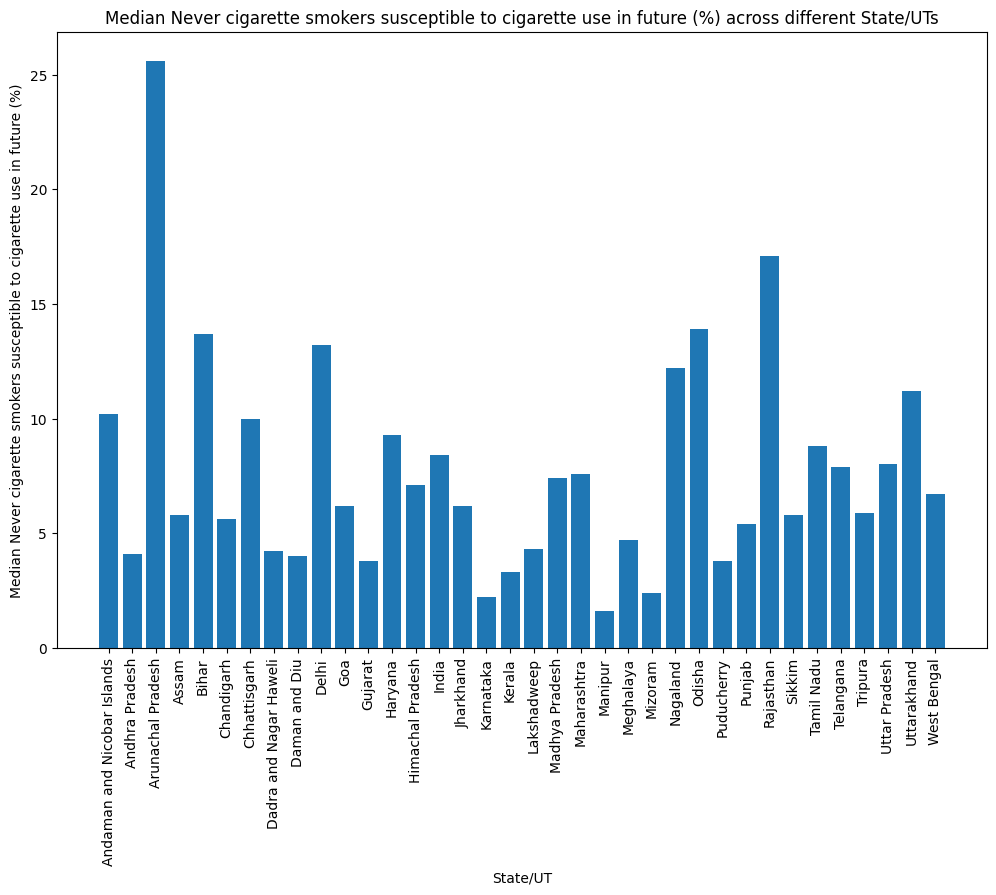

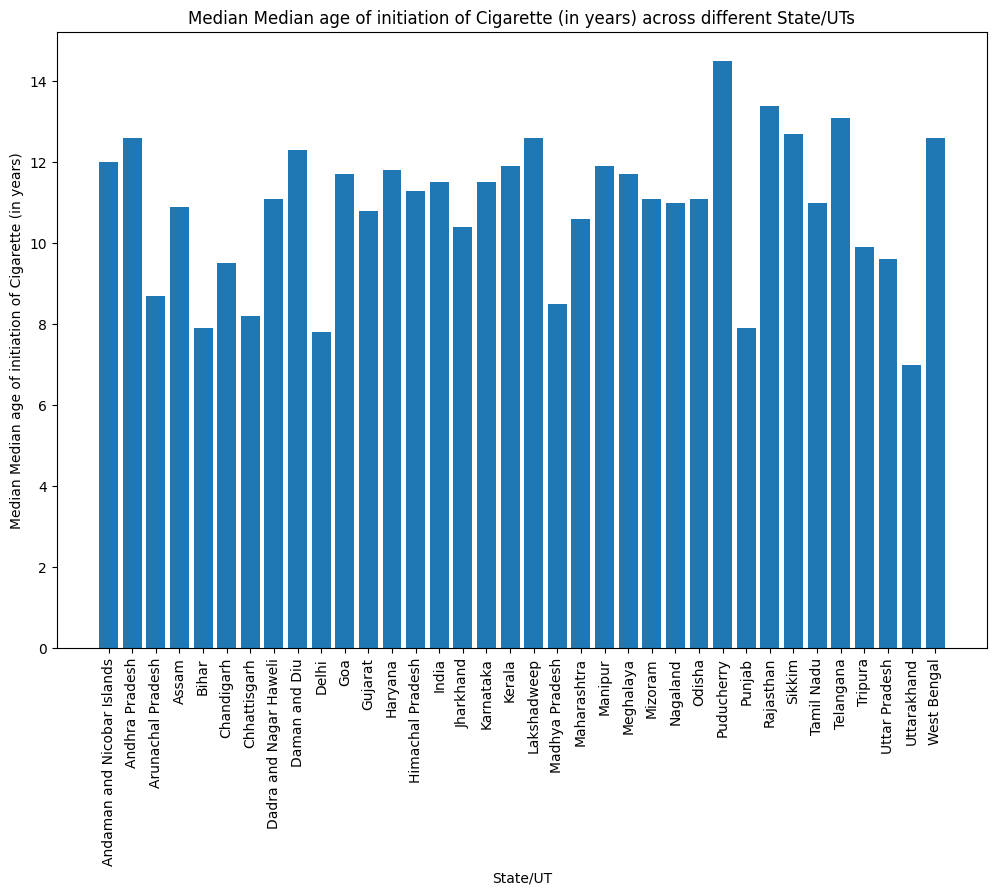

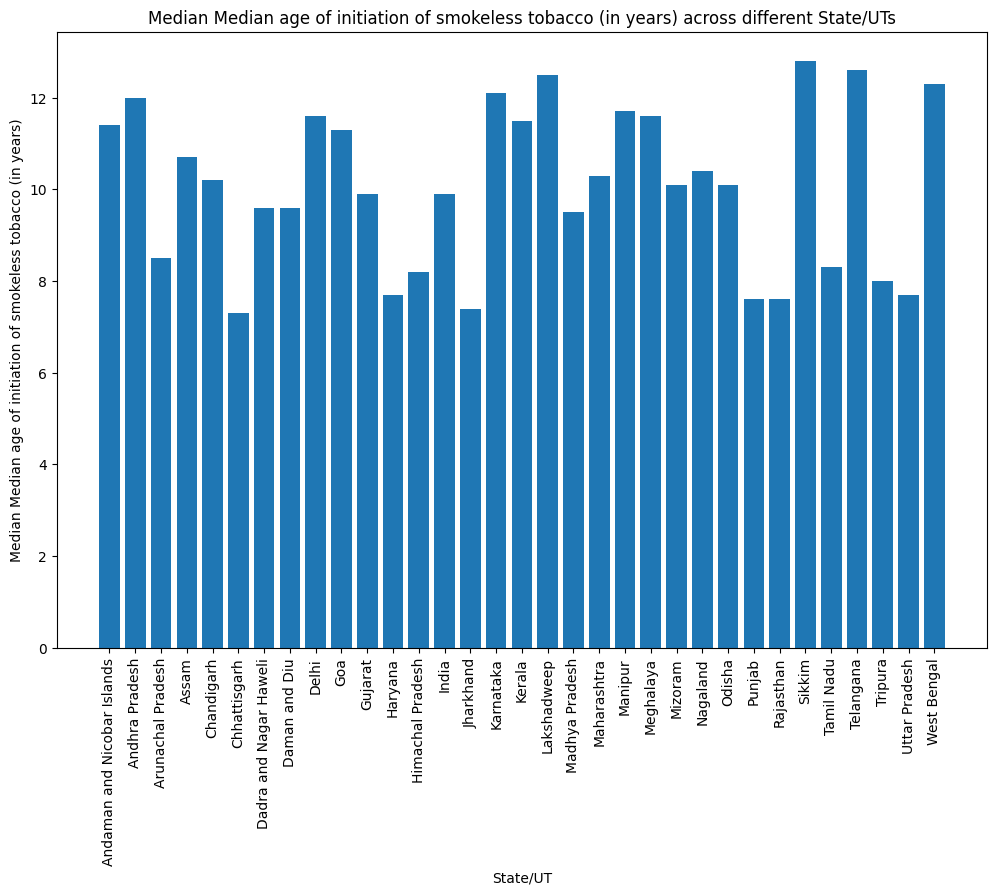

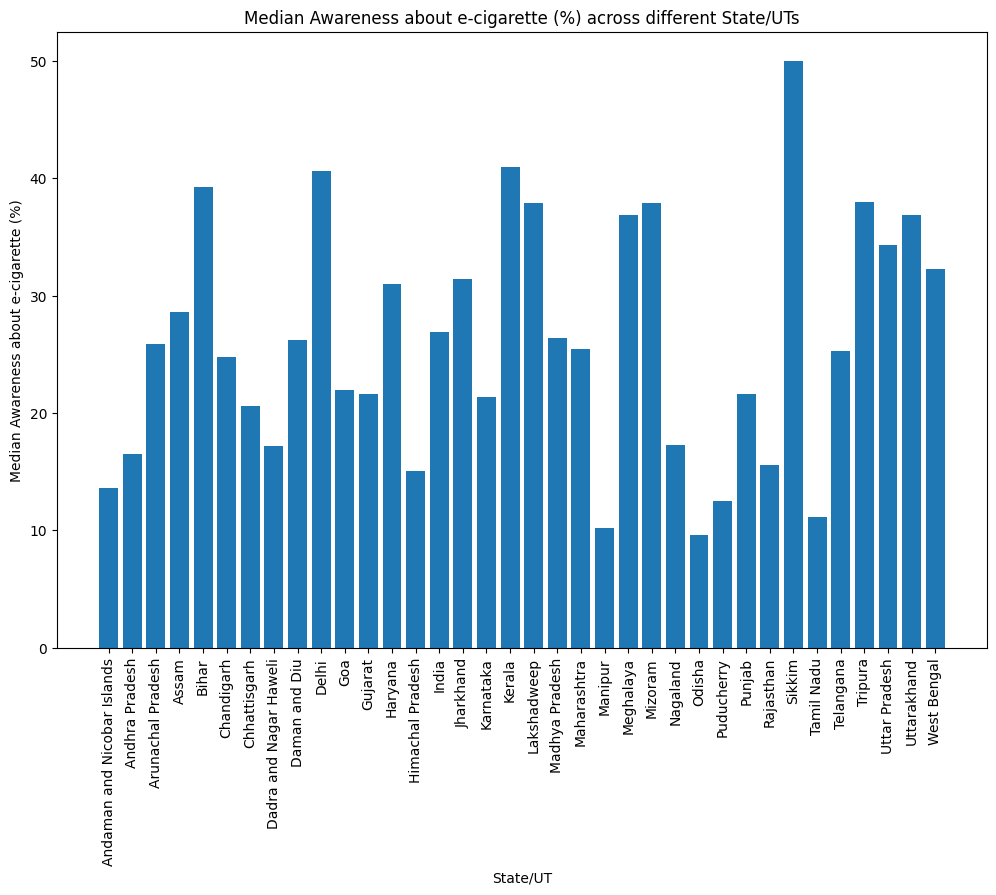

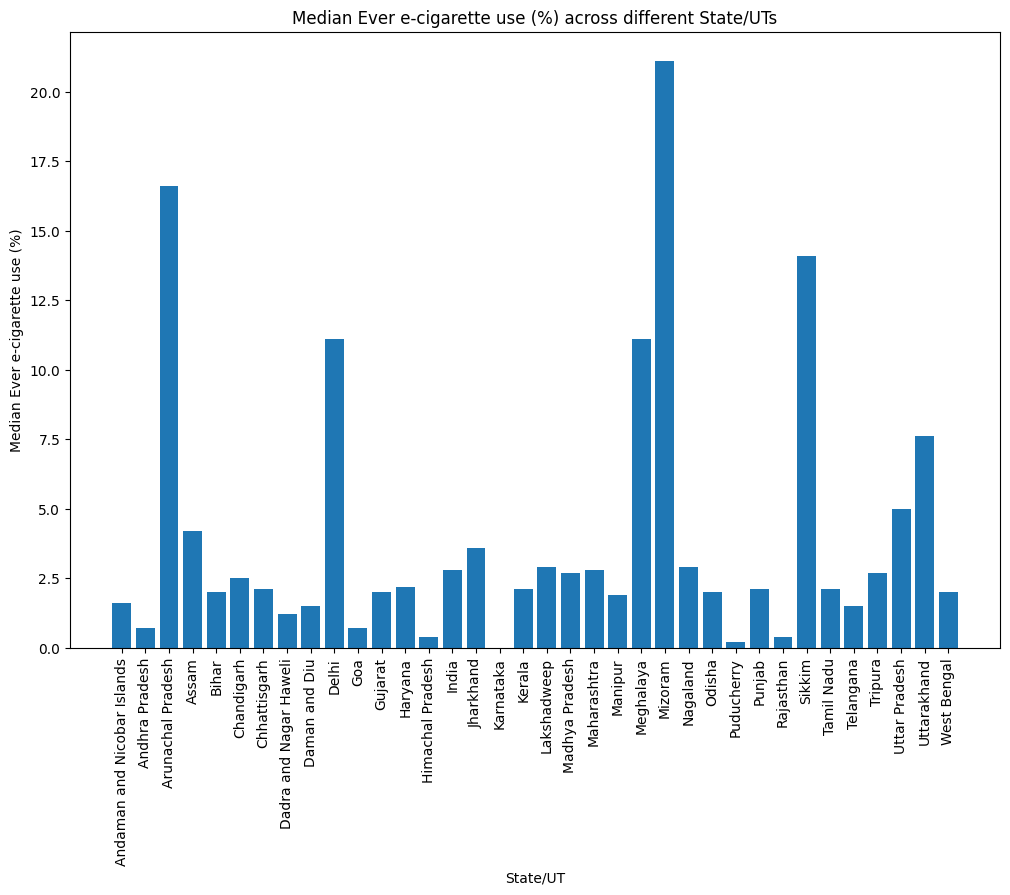

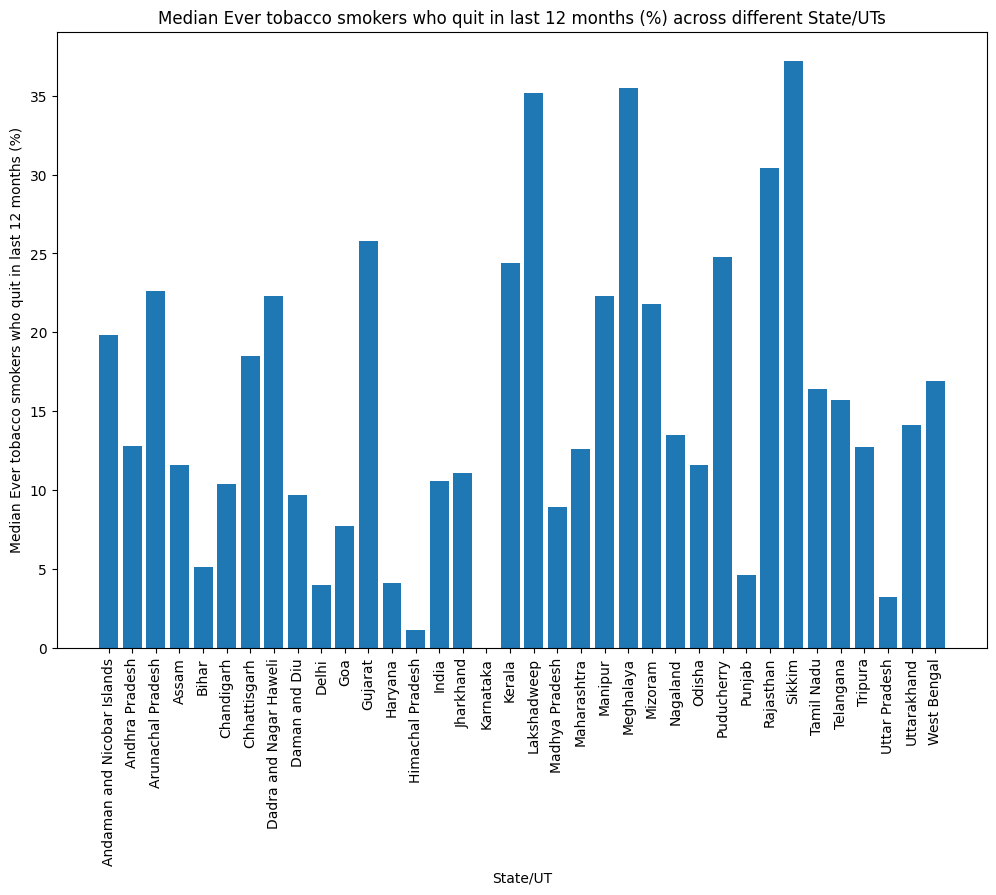

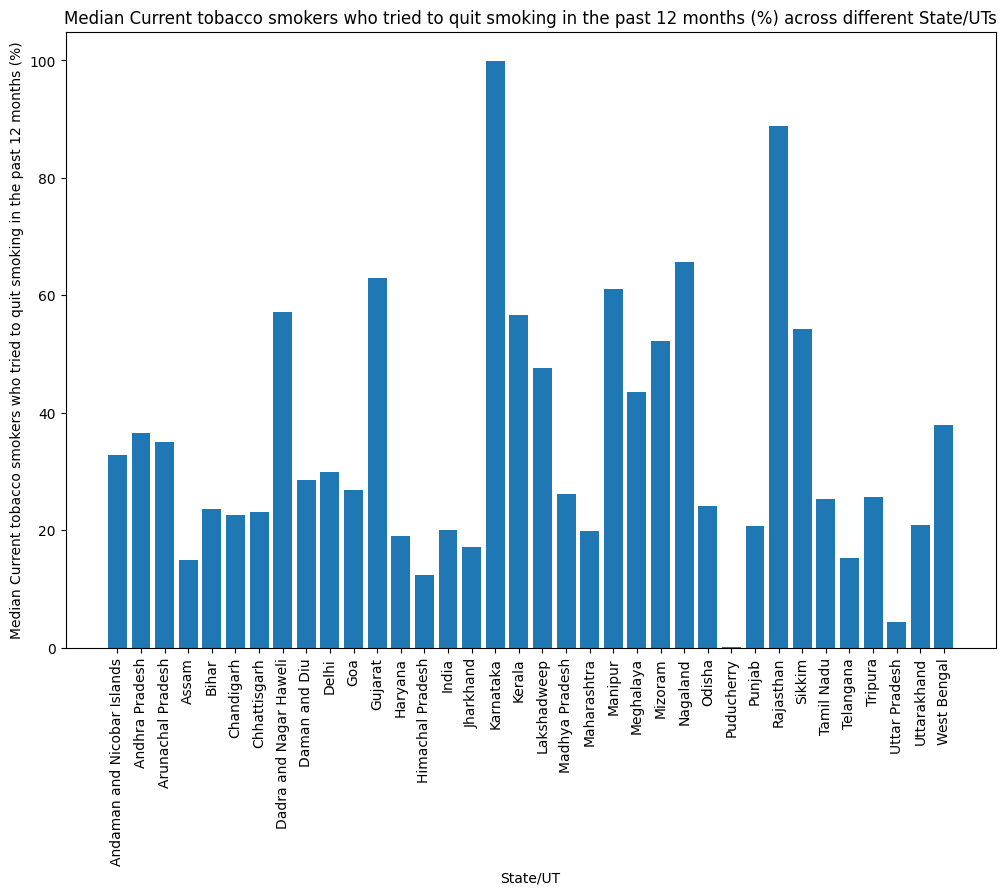

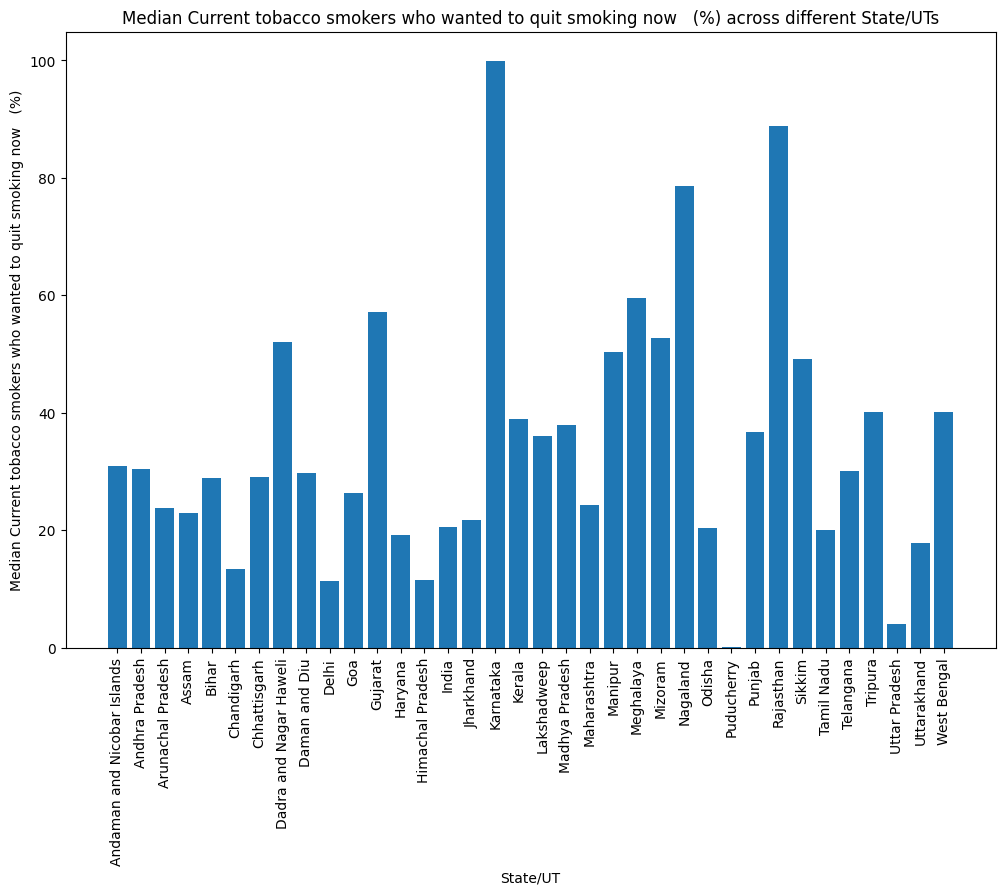

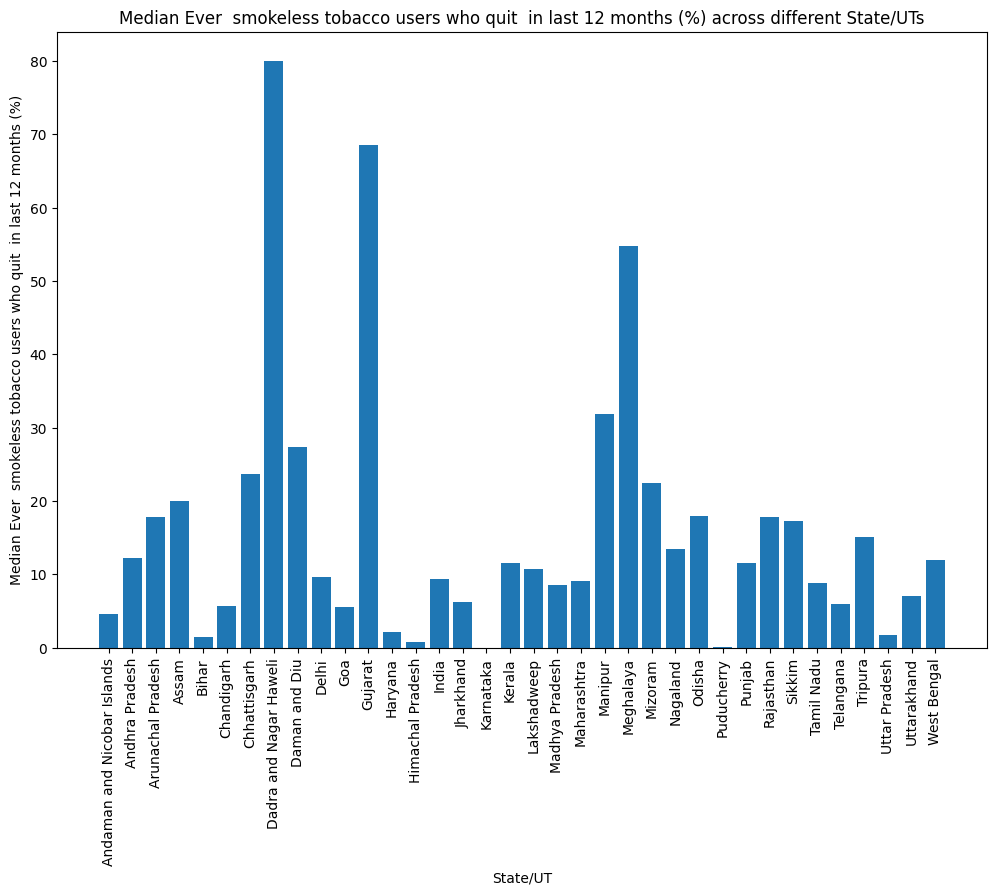

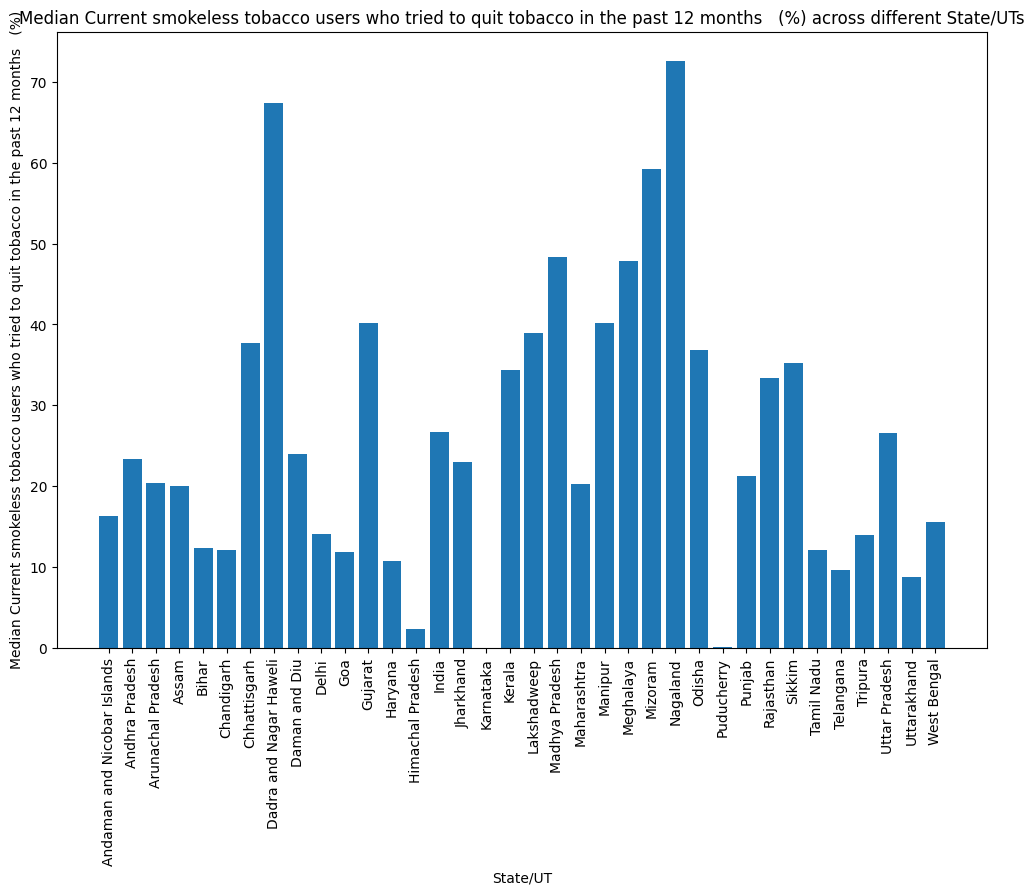

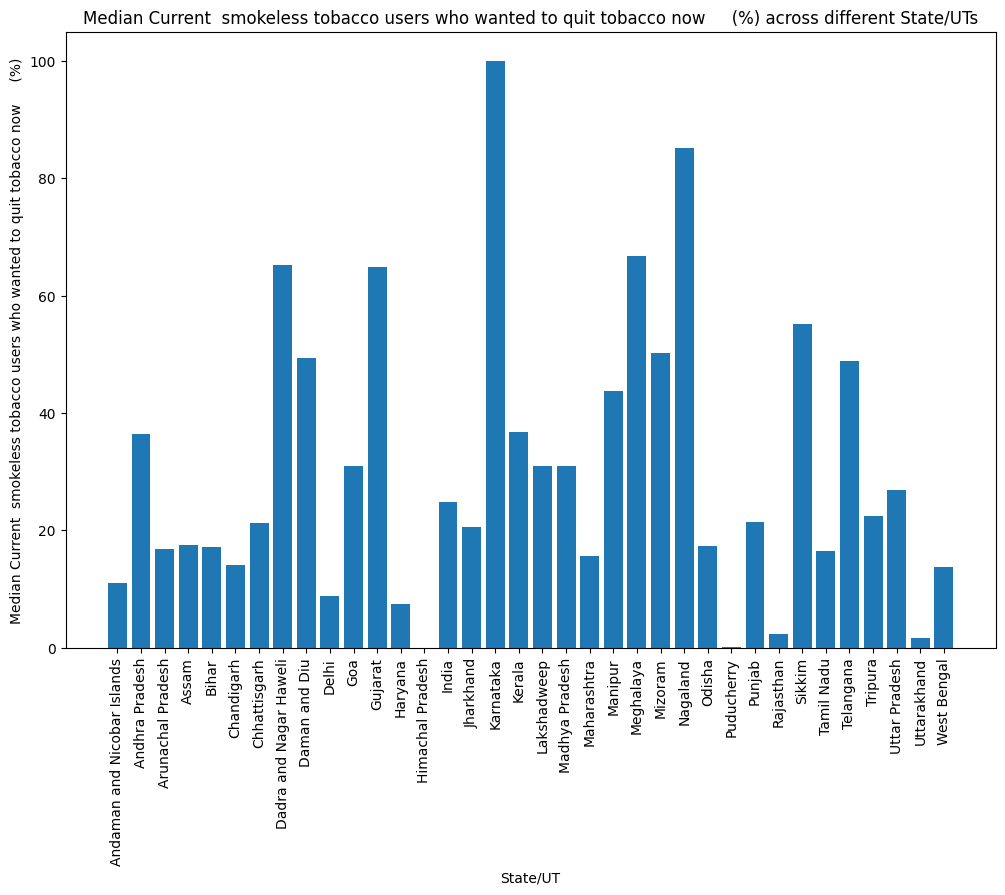

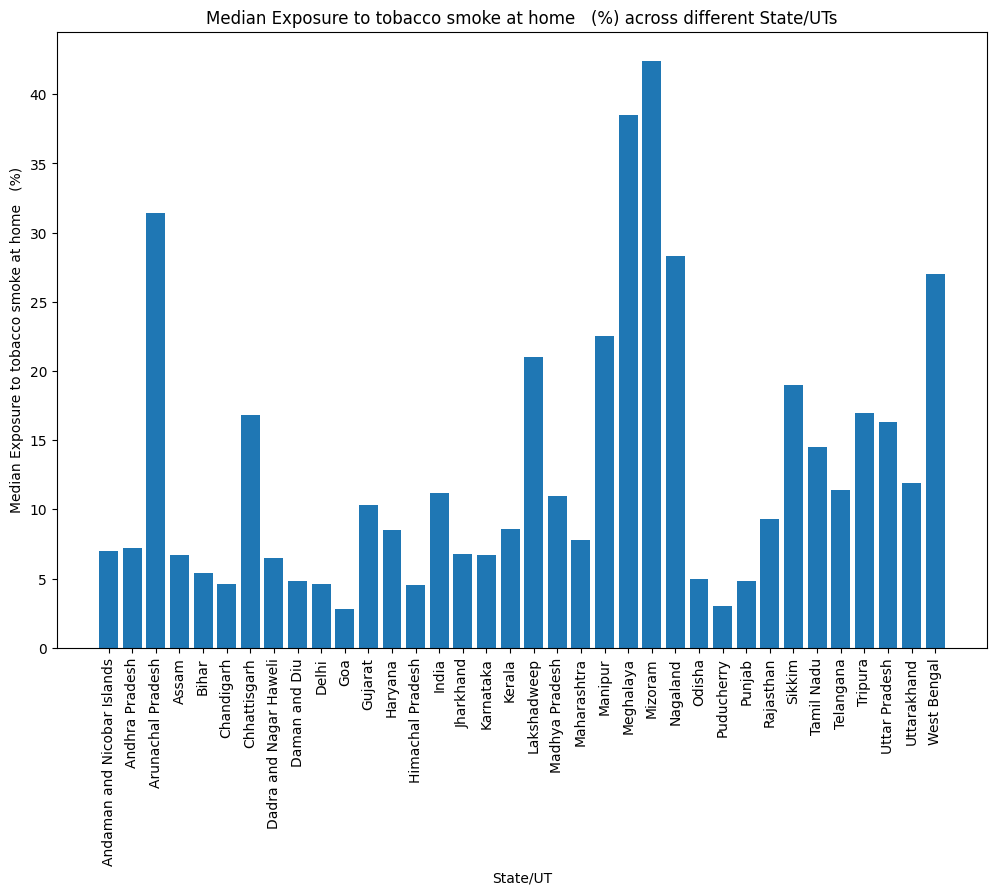

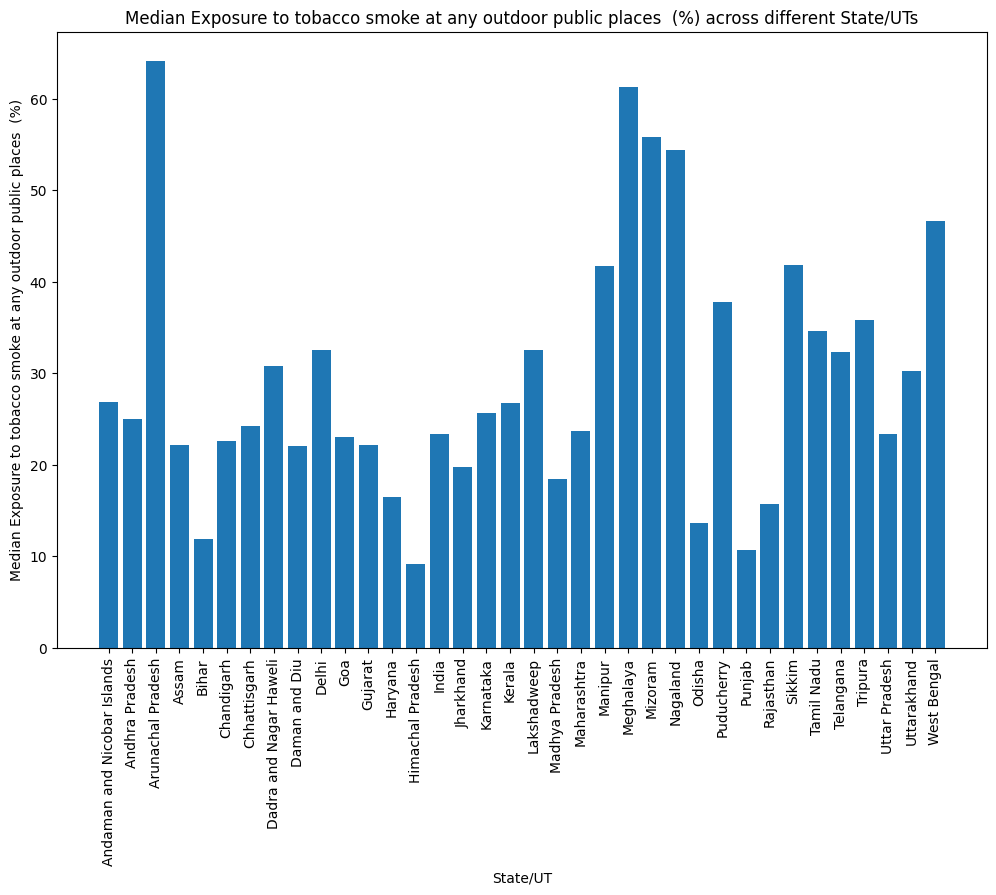

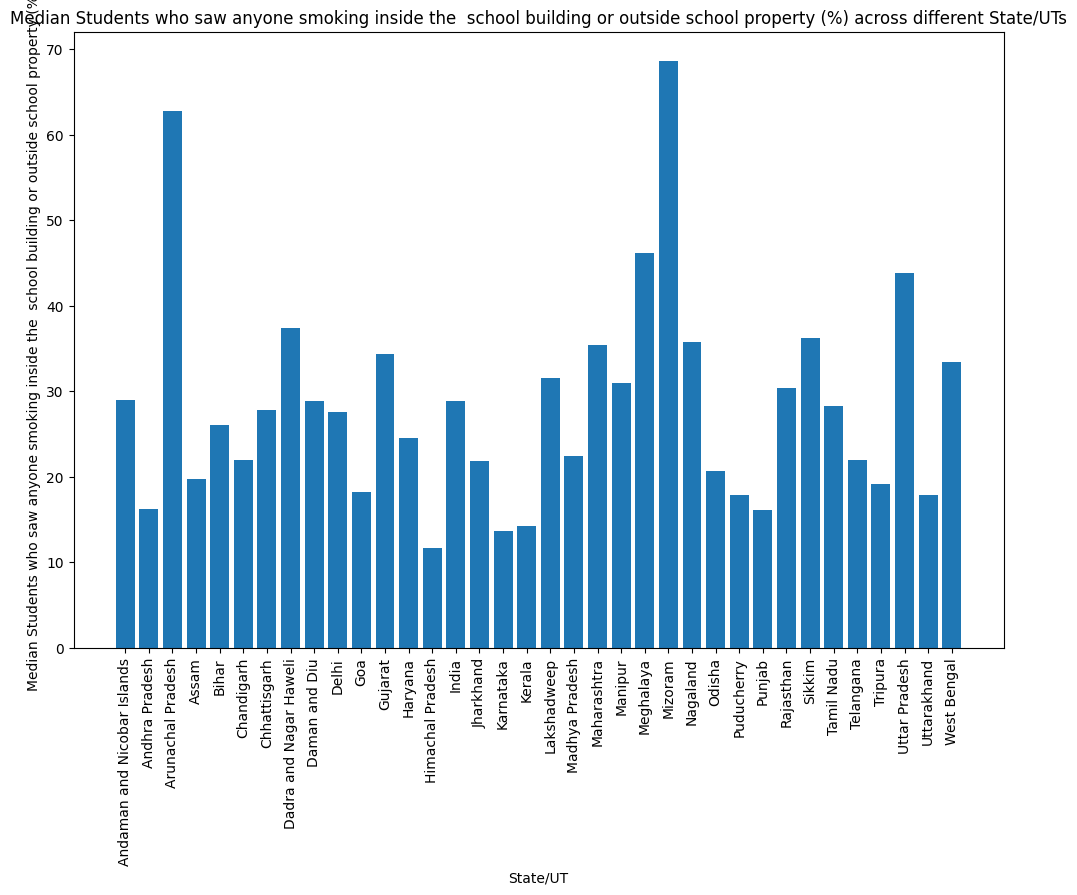

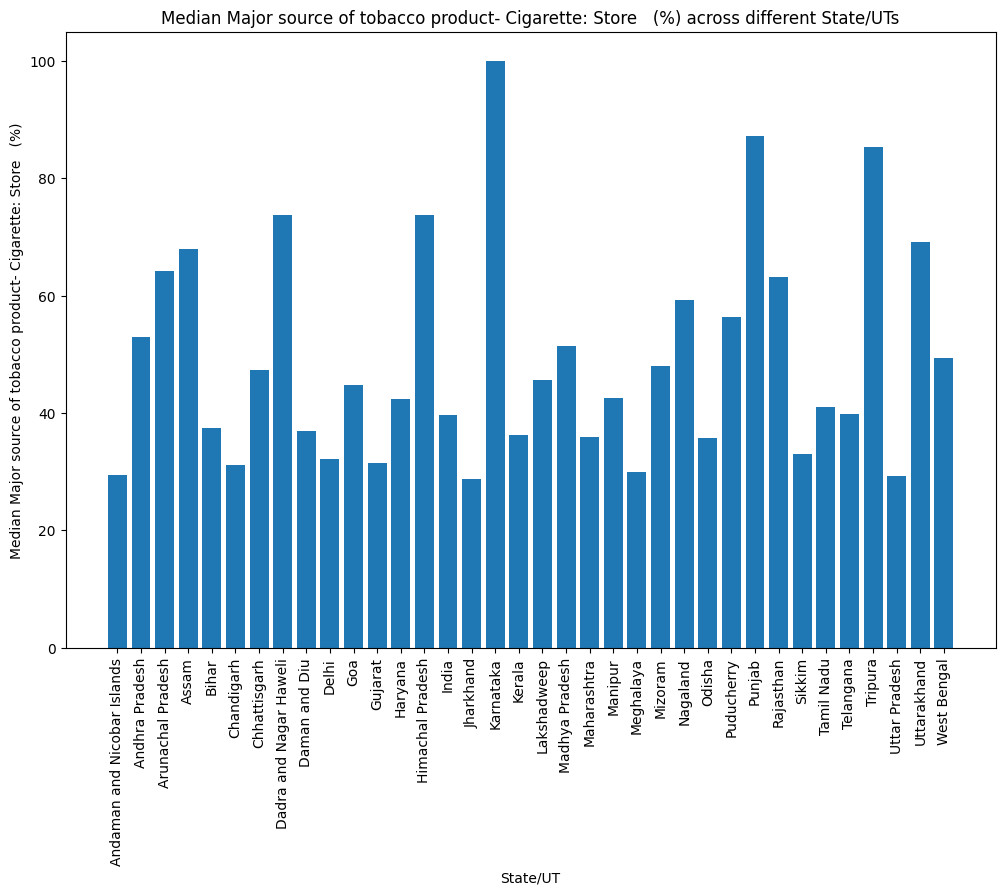

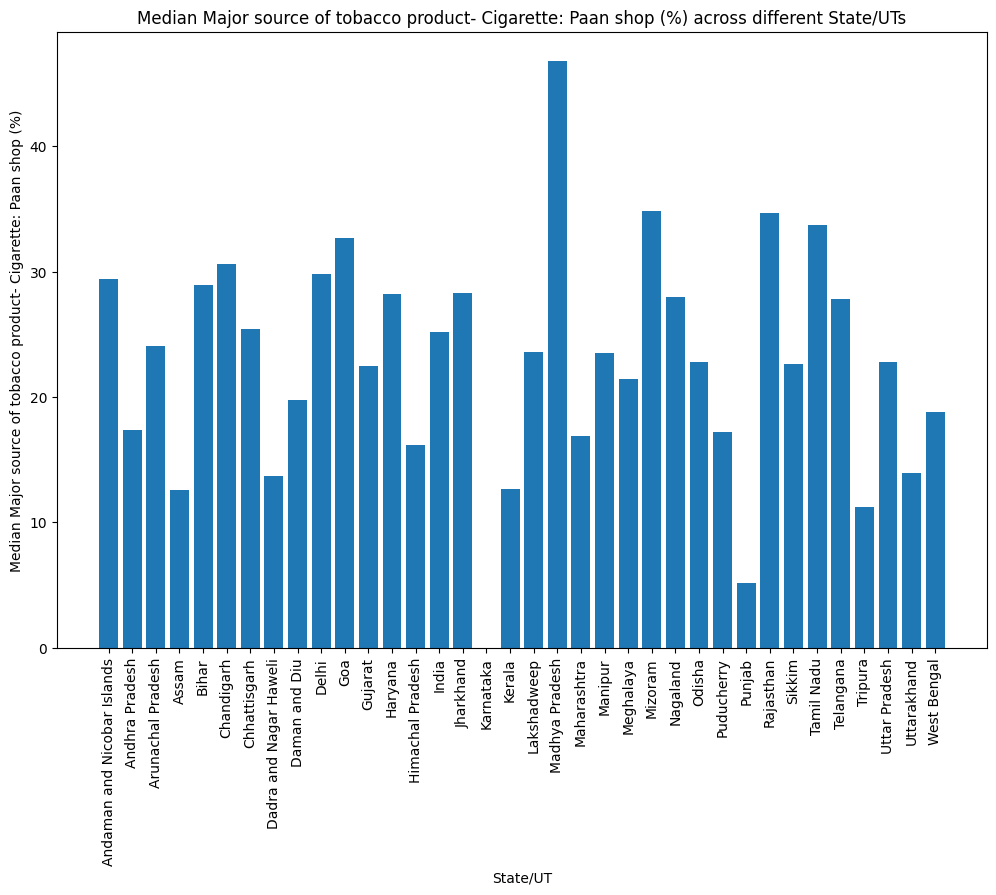

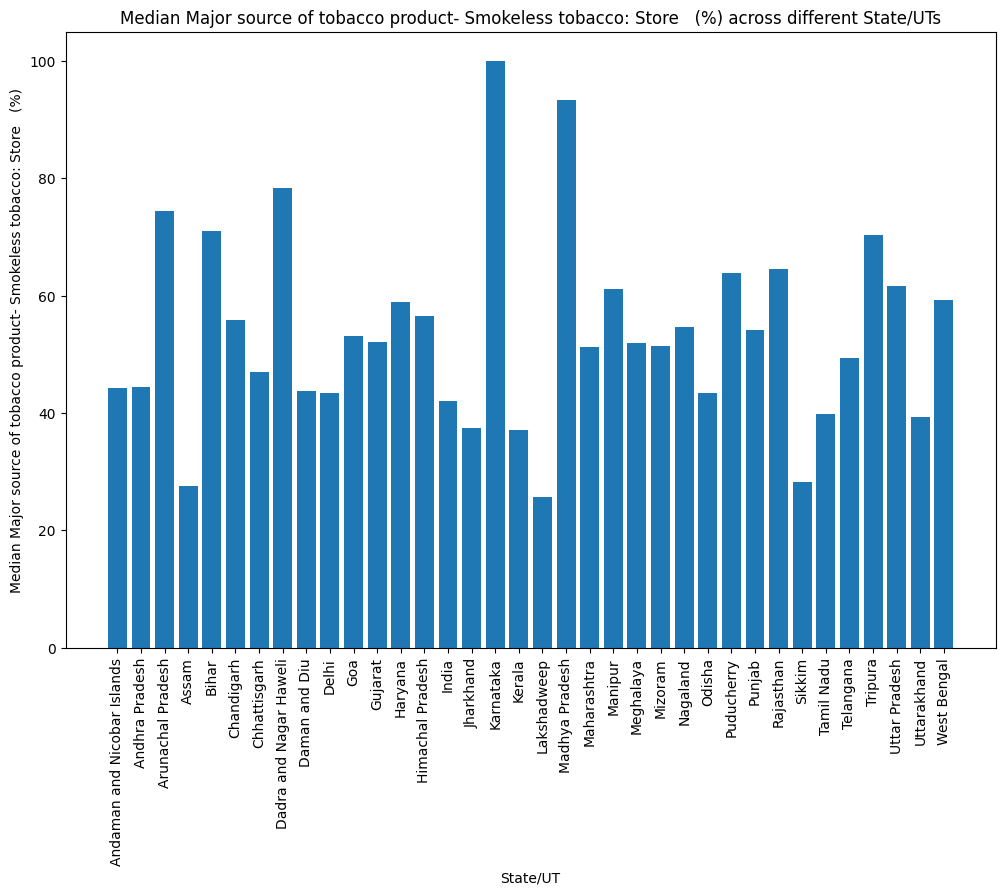

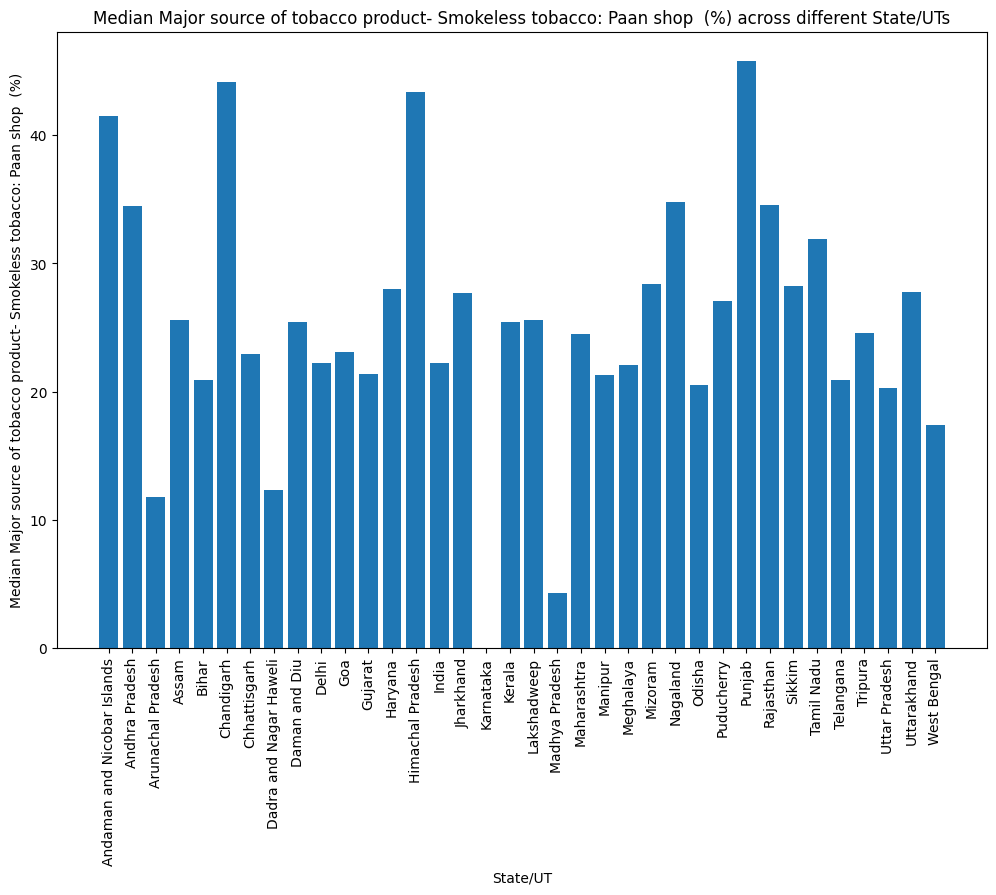

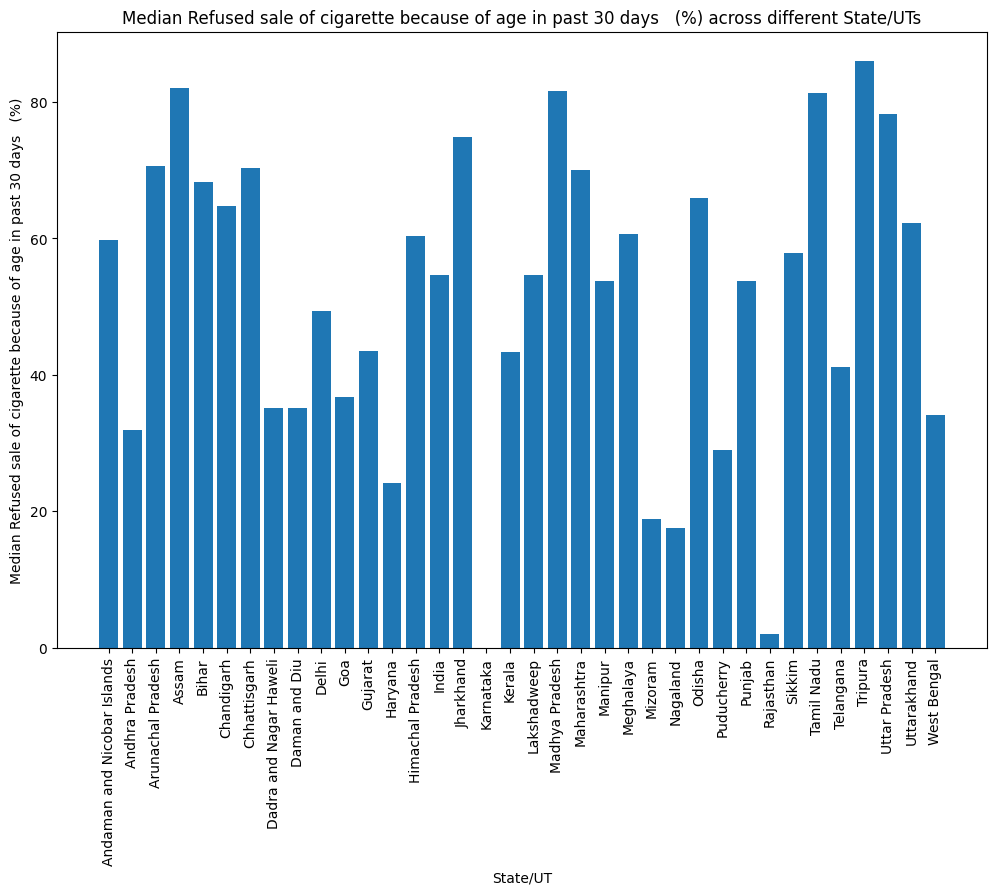

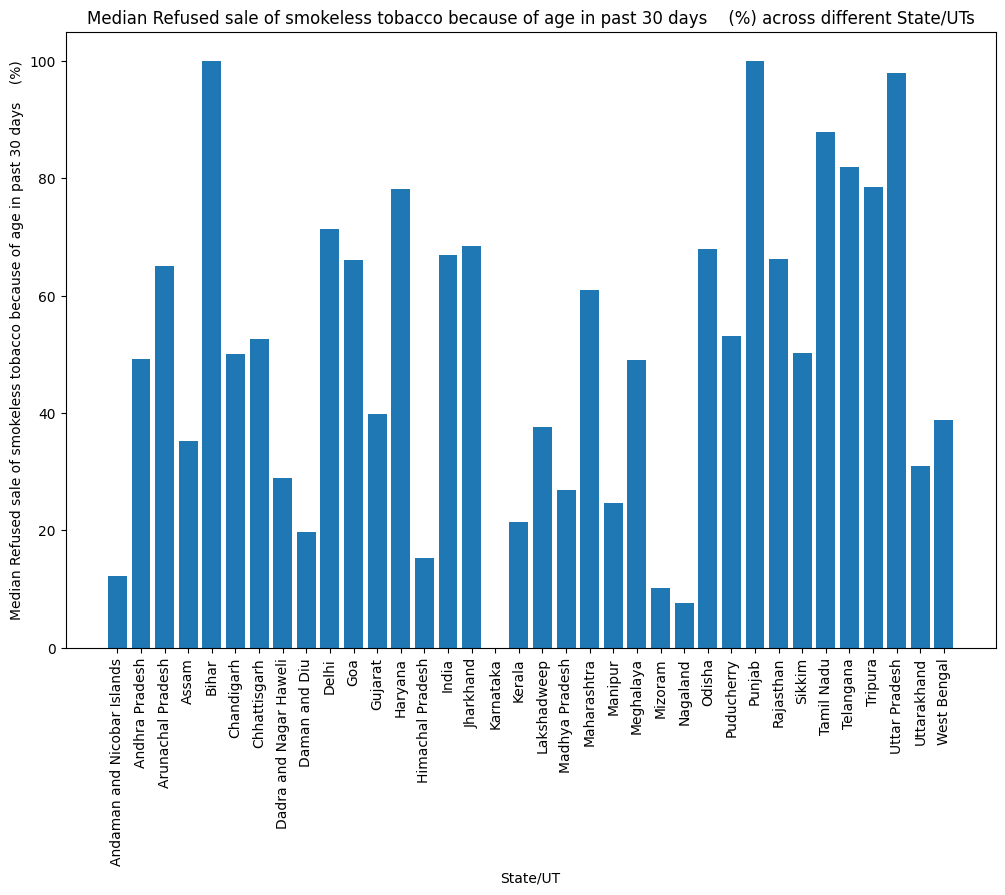

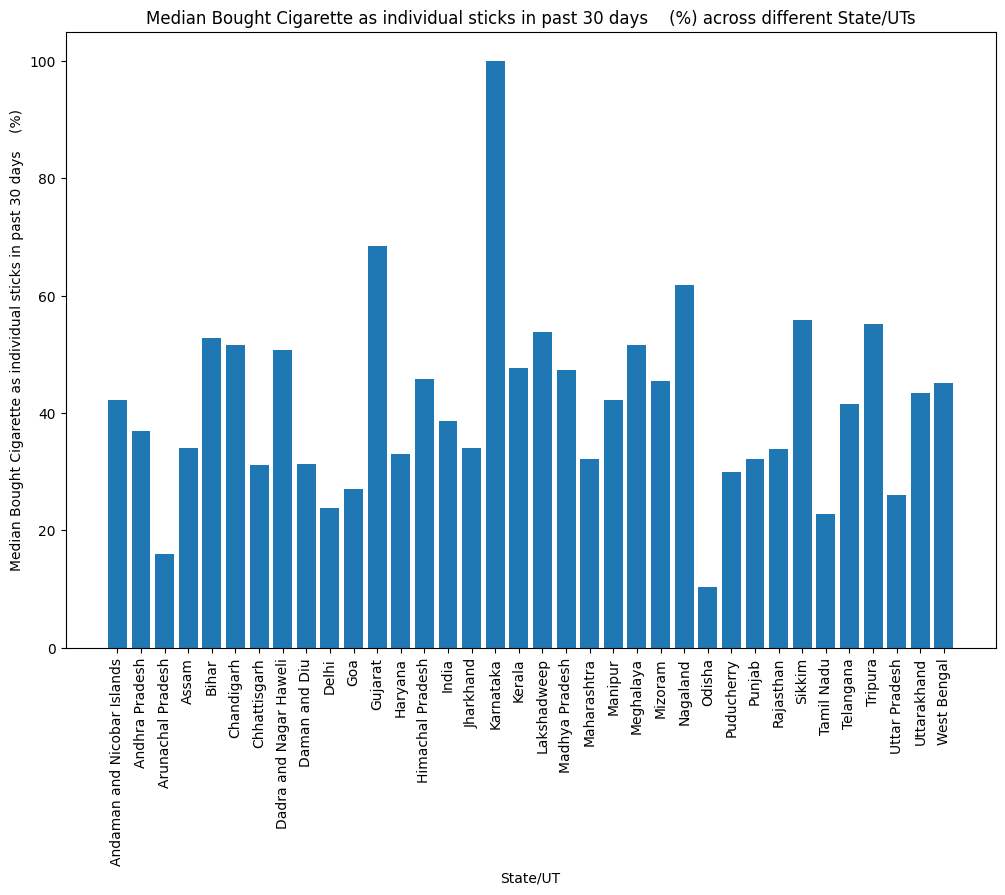

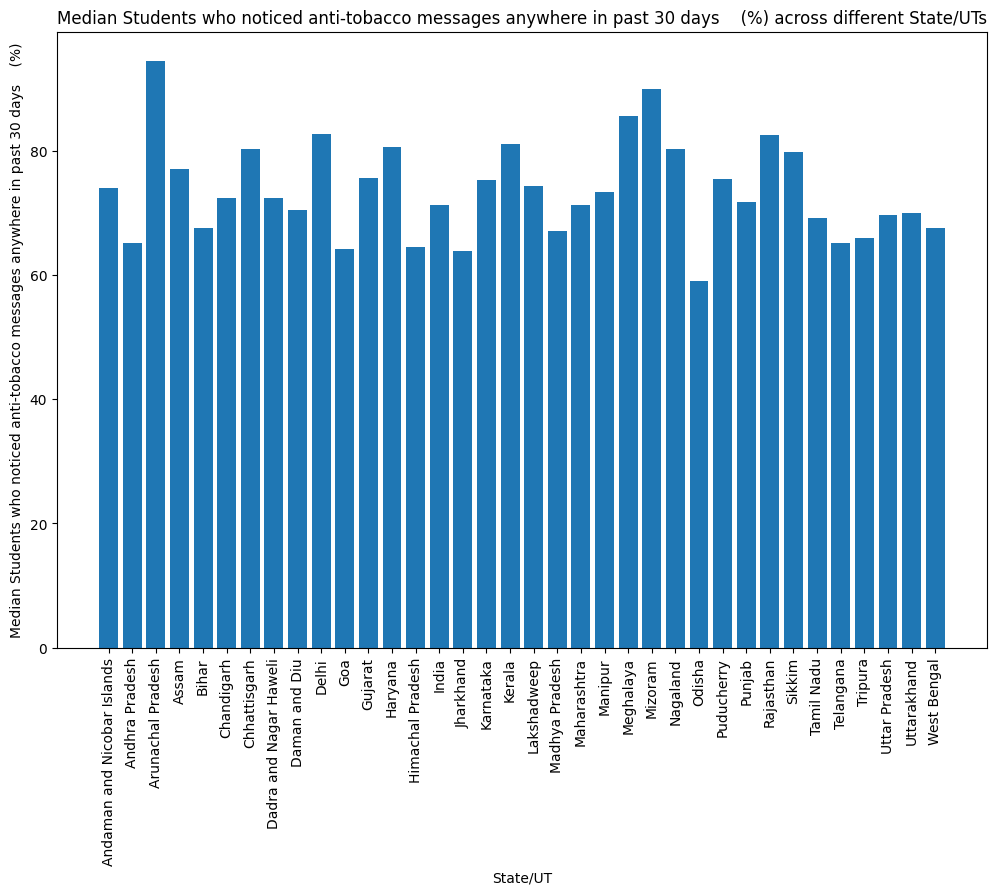

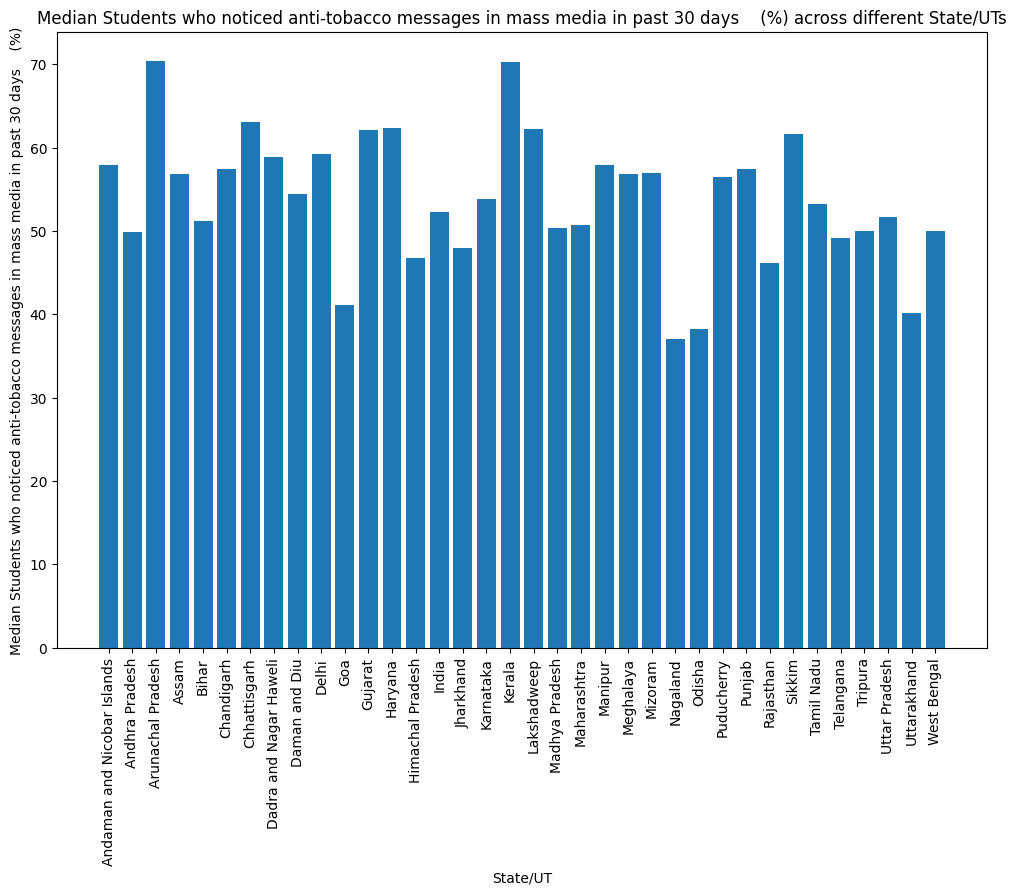

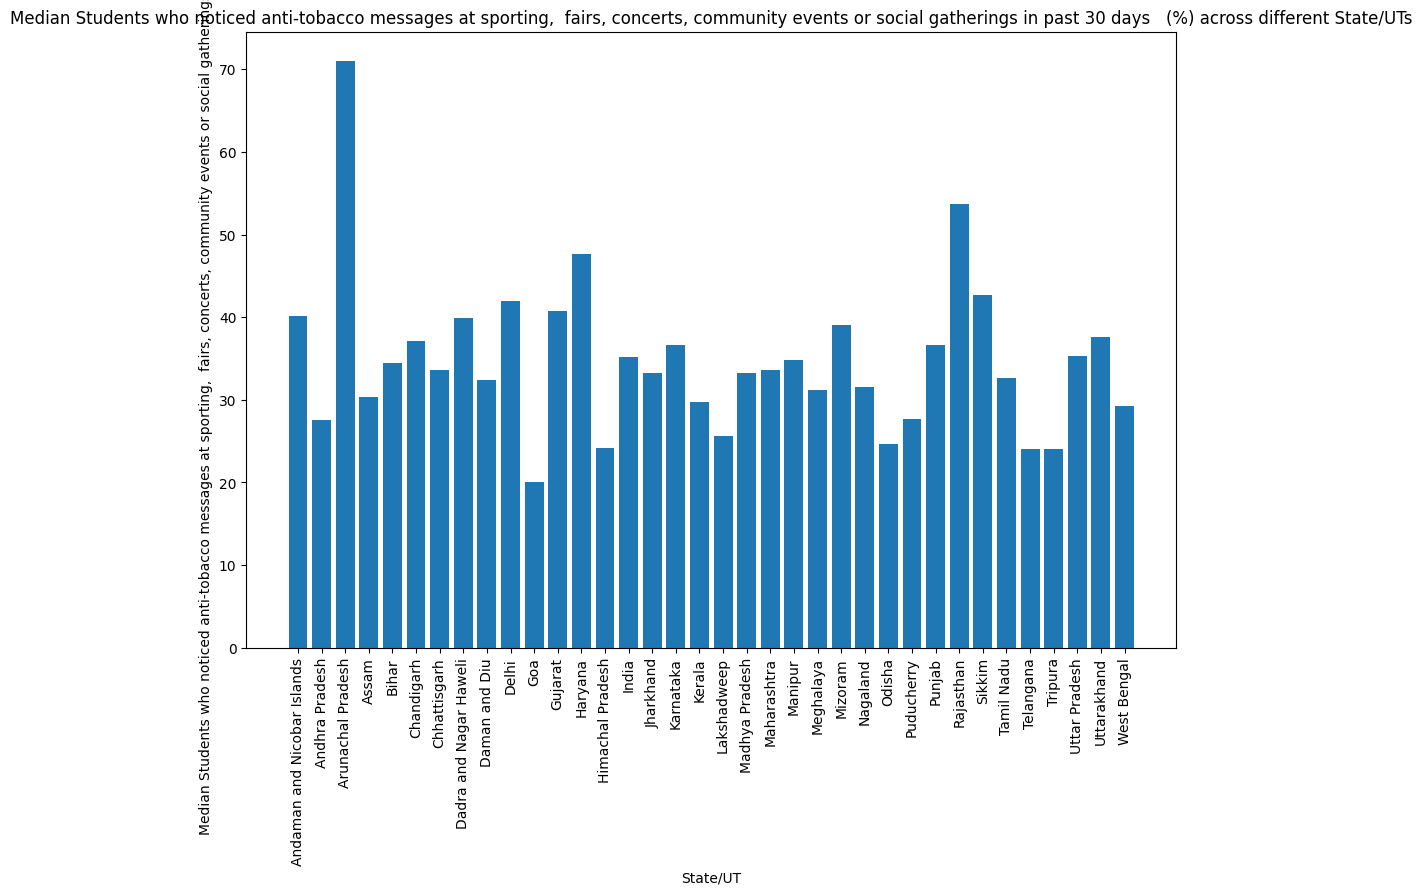

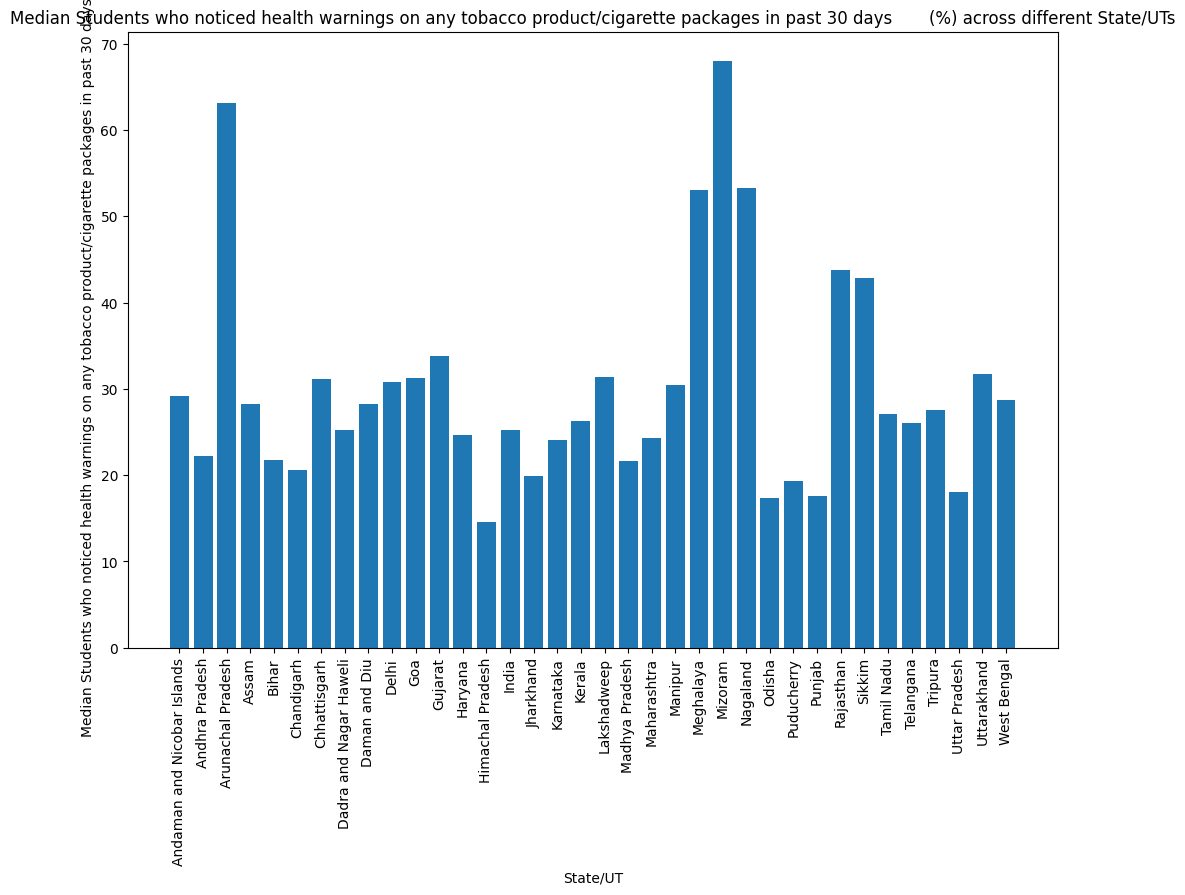

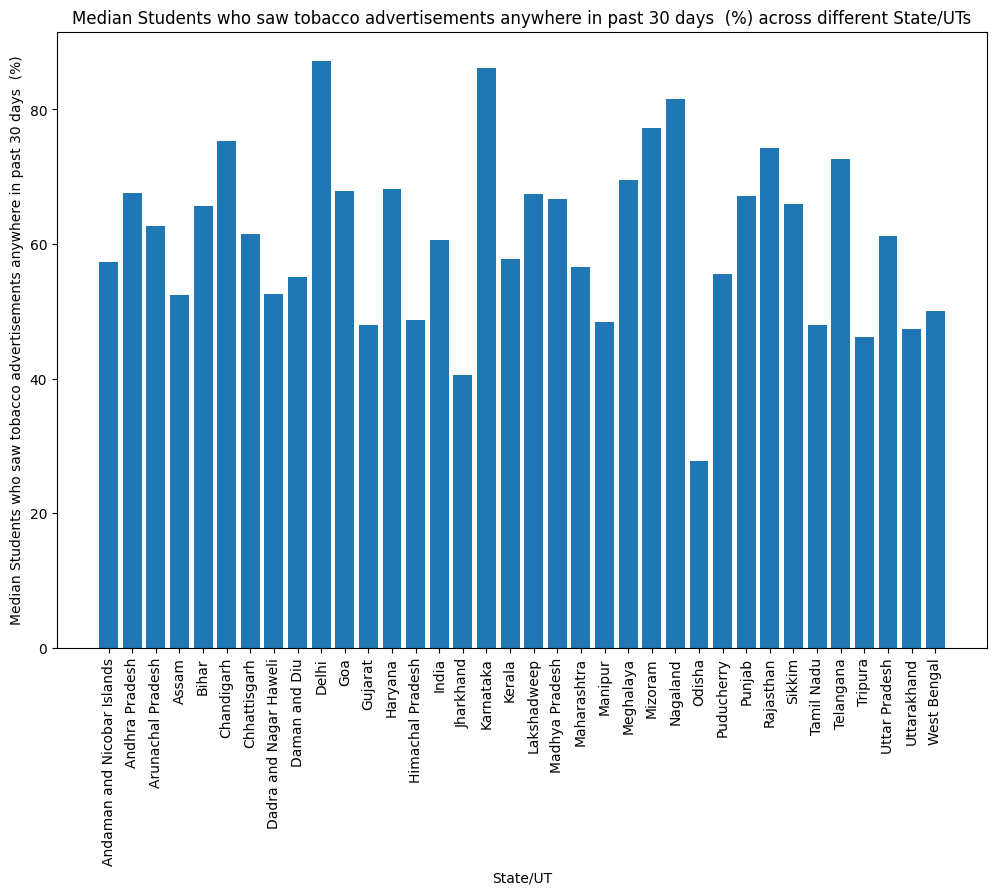

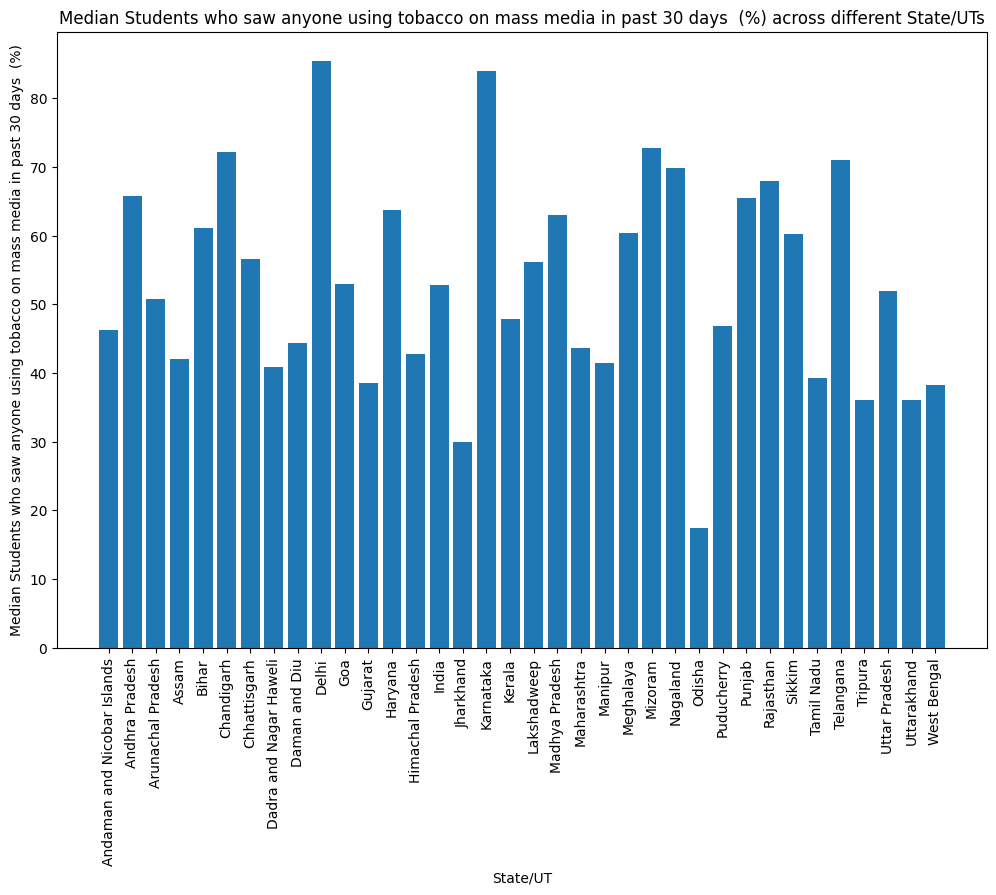

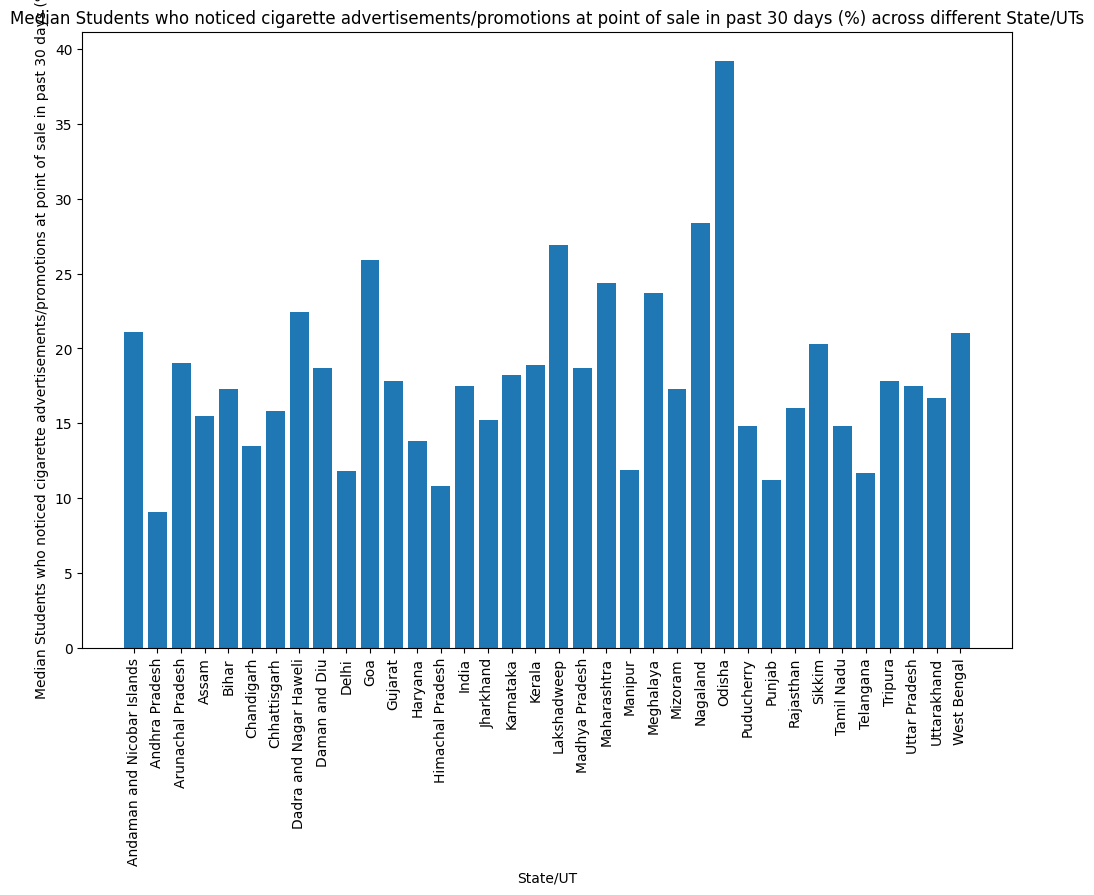

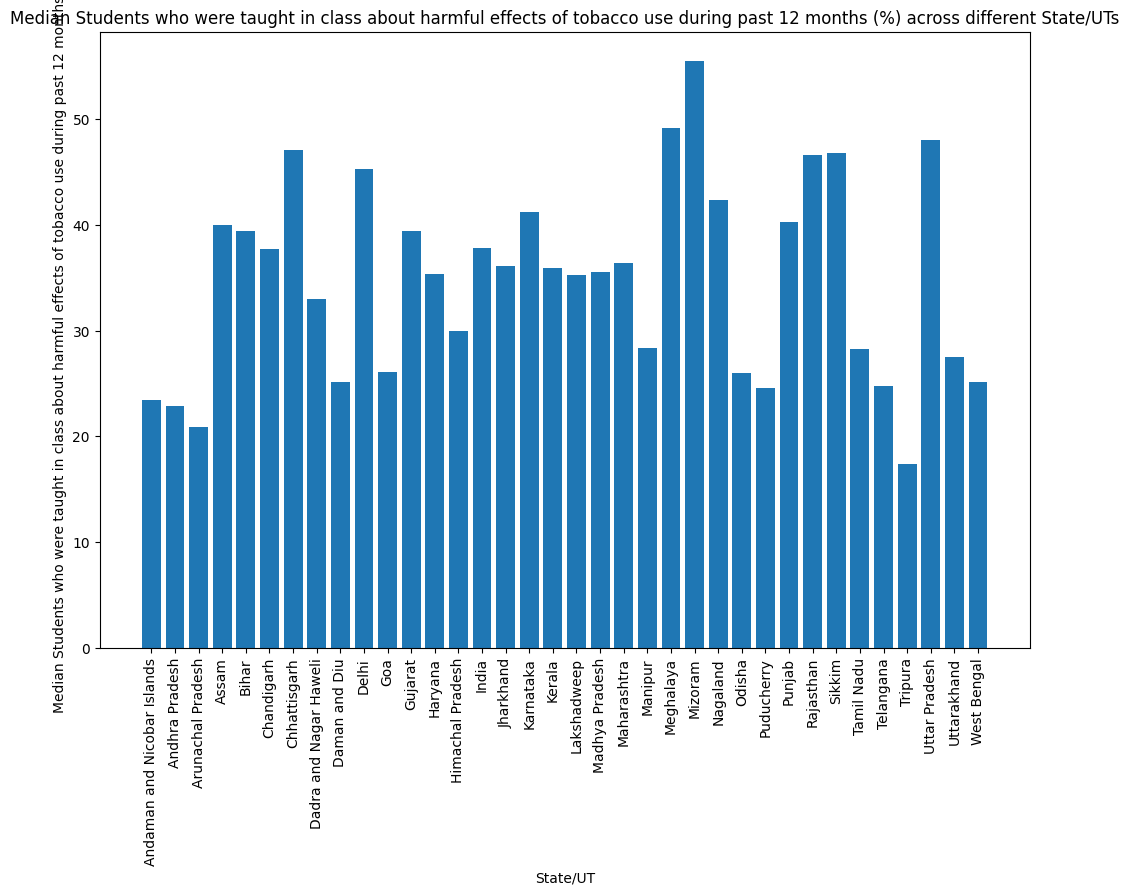

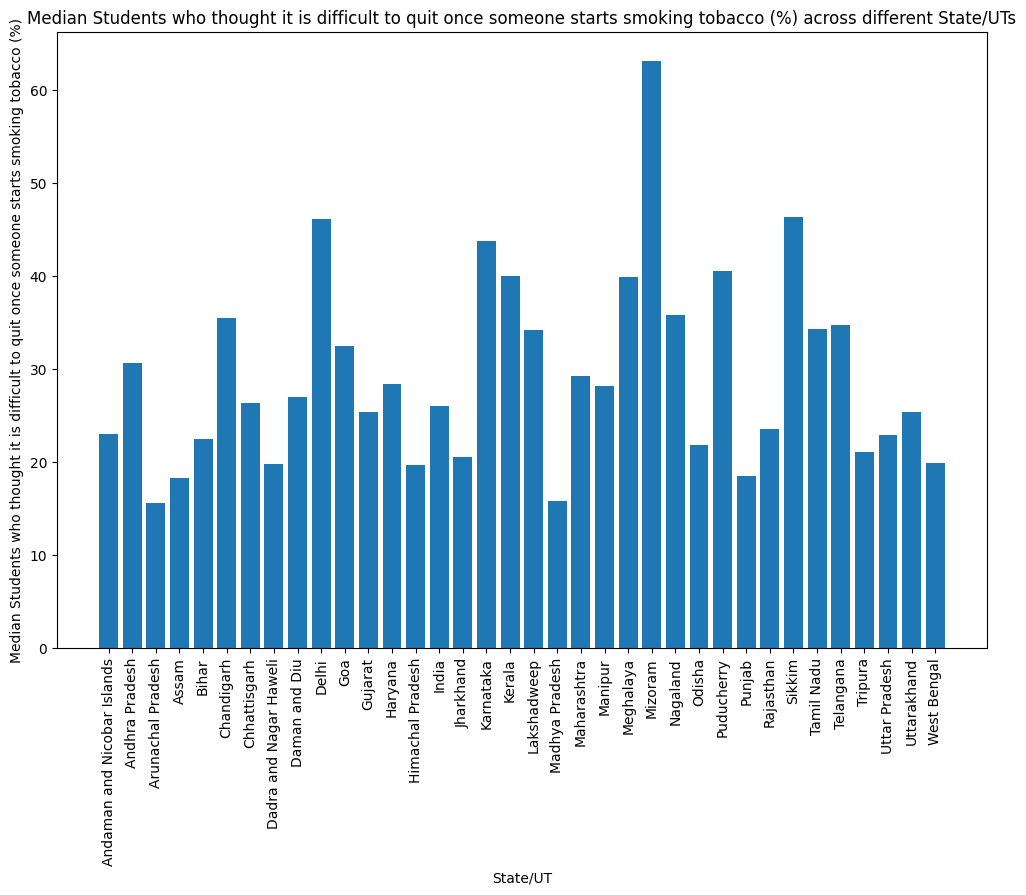

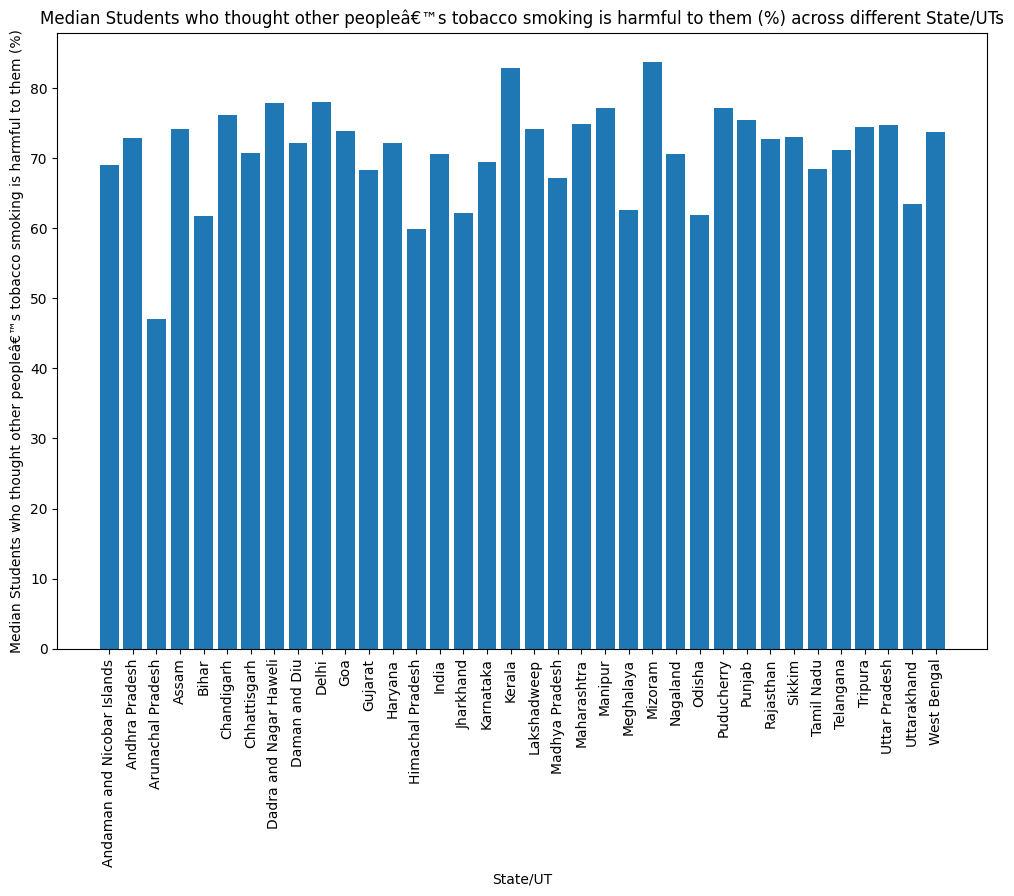

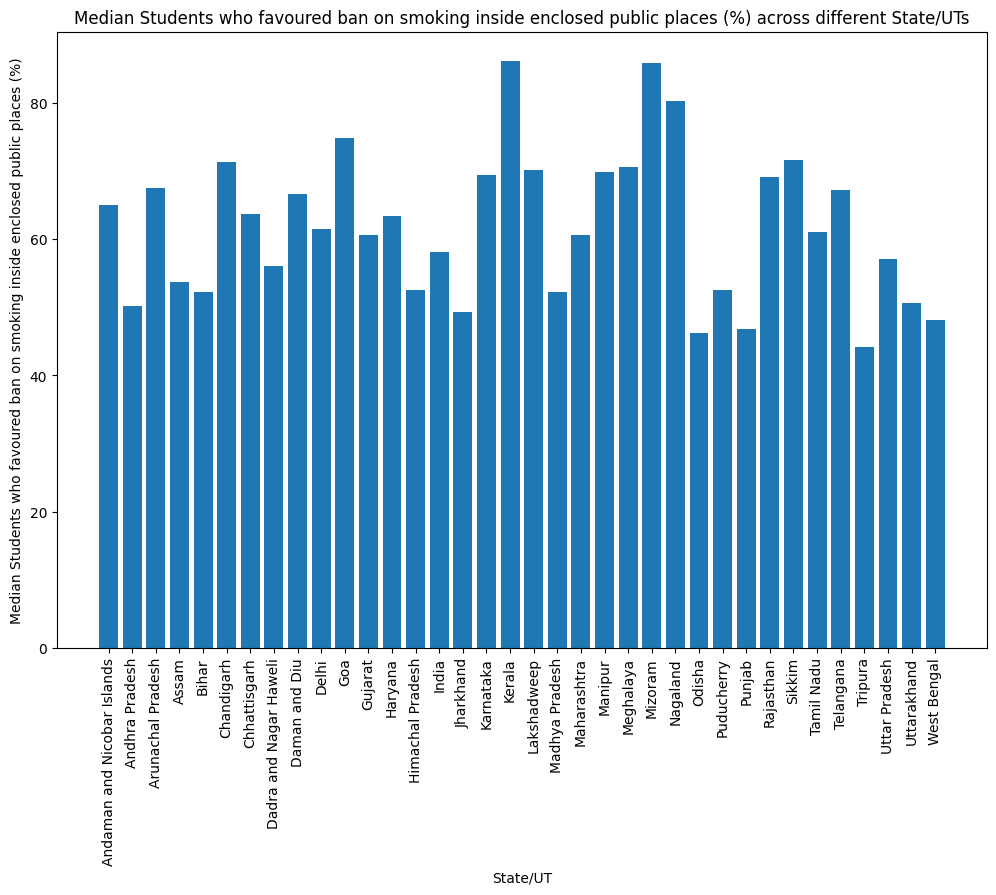

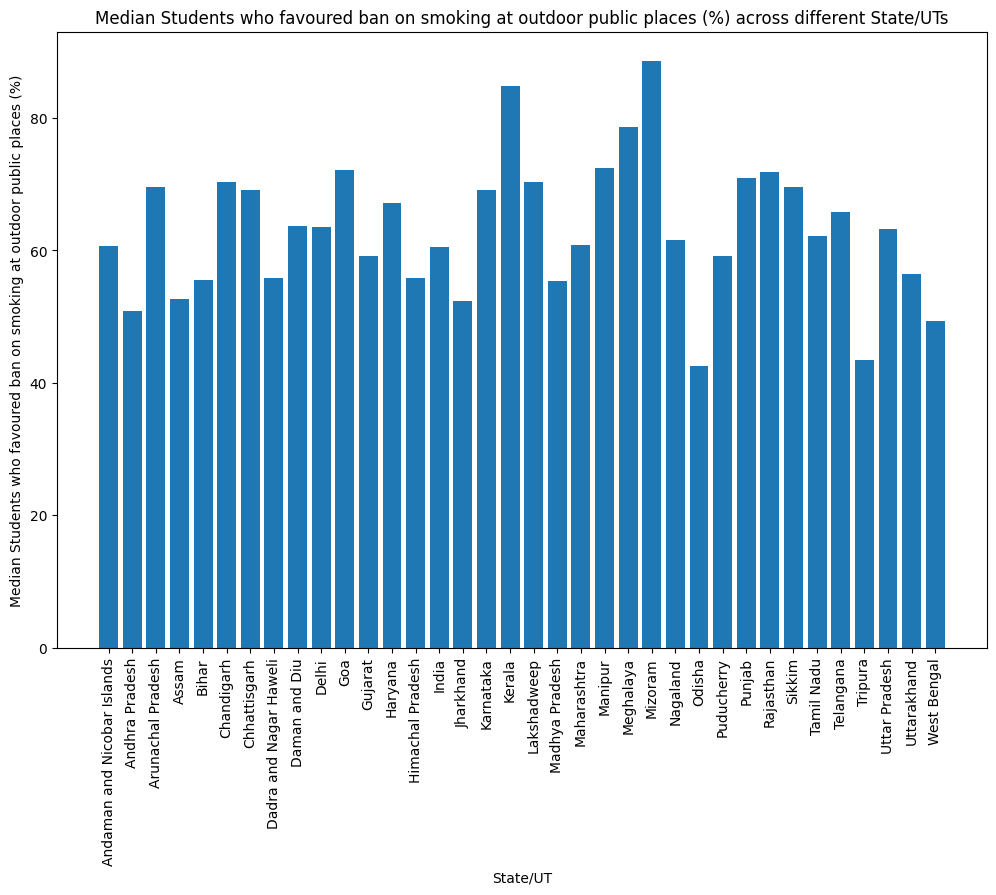

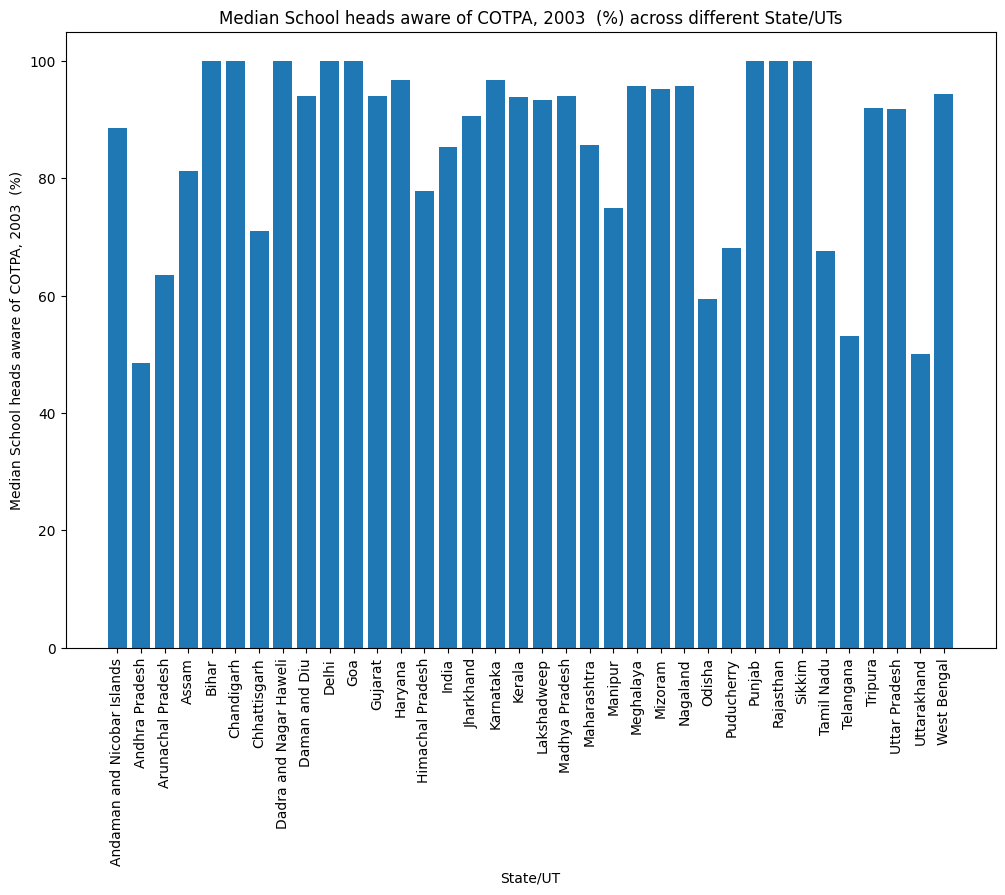

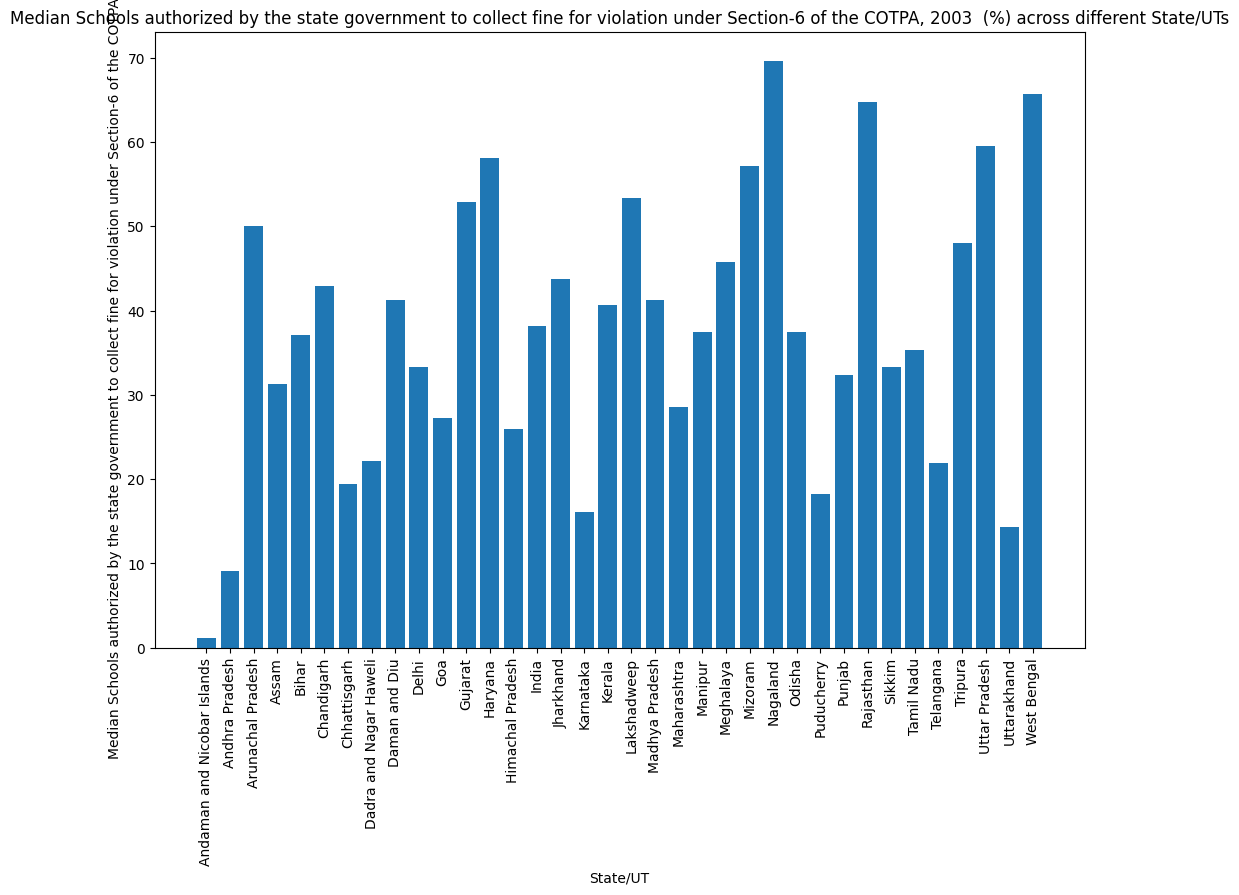

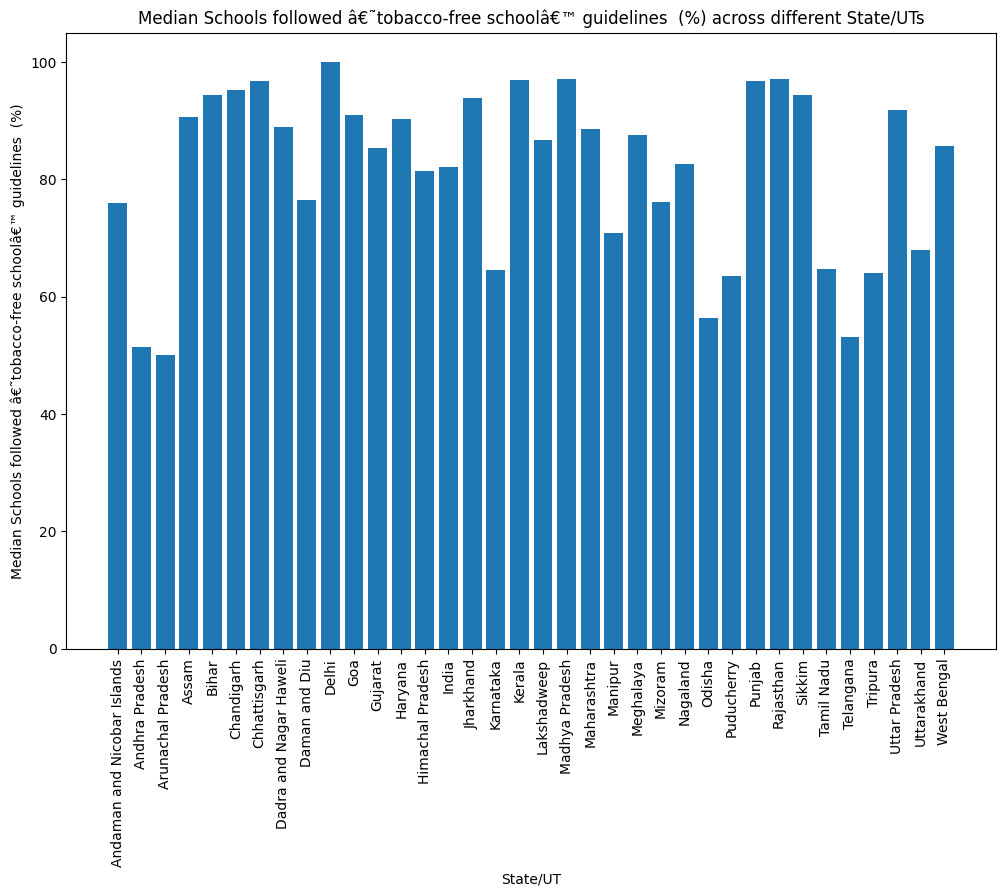

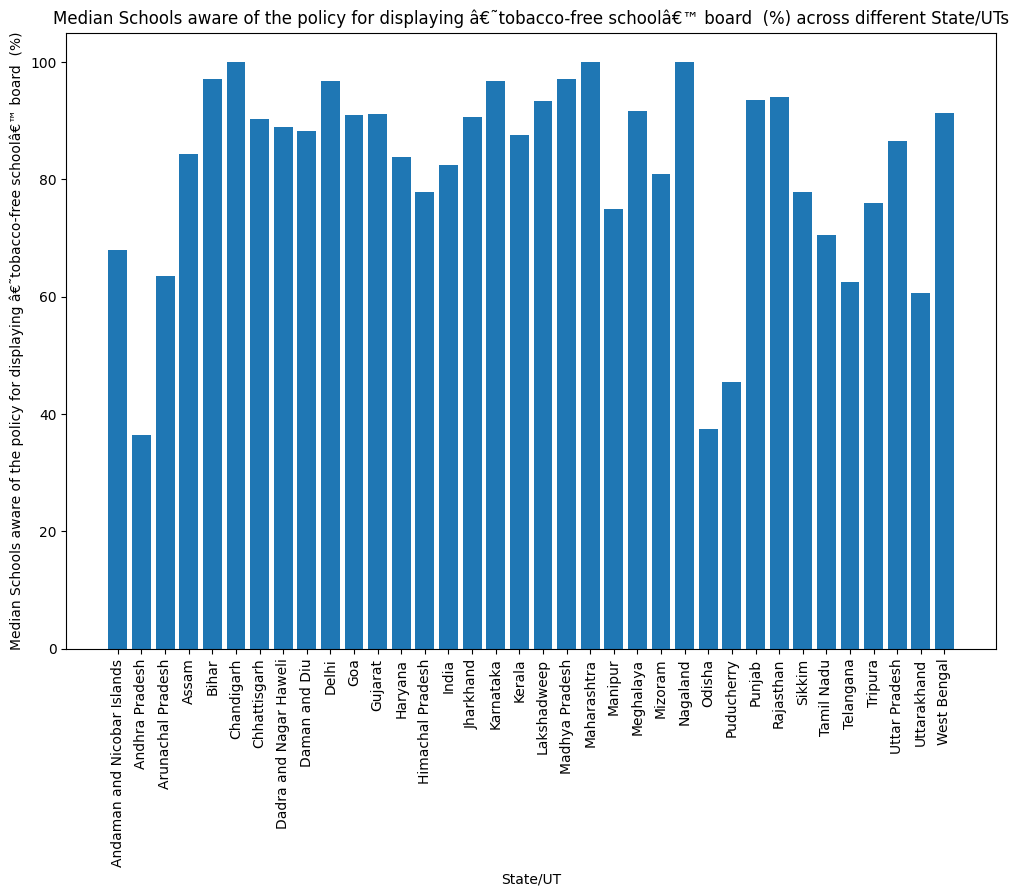

In [5]:
for pollutant in data.columns:
    if pollutant == 'State/UT' or pollutant == 'Area':
            continue
    create_bar_plot(data, pollutant)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List


def create_correlation_matrix(
    raw_data: pd.core.frame.DataFrame,
    pollutants_list: List[str],
):
    """Creates a correlation matrix of the features.

    Args:
        raw_data (pd.core.frame.DataFrame): The data used.
        pollutants_list (List[str]): List of features to include in the plot.
    """
    plt.figure(figsize=(100,100))
    sns.heatmap(
        raw_data[pollutants_list].corr(),
        square=True,
        annot=True,
        cbar=False,
        cmap="RdBu",
        vmin=-1,
        vmax=1
    )
    plt.title('Correlation Matrix of Variables')

    plt.show()

In [7]:
create_correlation_matrix(data,data.columns)

/tmp/ipykernel_5530/1715844100.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data[pollutants_list].corr(),


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

def create_correlation_matrix(
    raw_data: pd.core.frame.DataFrame,
    pollutants_list: List[str],
):
    """Creates a correlation matrix of the features.

    Args:
        raw_data (pd.core.frame.DataFrame): The data used.
        pollutants_list (List[str]): List of features to include in the plot.
    """
    # Ensure the DataFrame contains the specified pollutants_list columns
    if not all(pollutant in raw_data.columns for pollutant in pollutants_list):
        raise ValueError("All pollutants in the pollutants_list must be columns in the DataFrame.")
    
    # Handle missing values
    raw_data = raw_data.dropna(subset=pollutants_list)
    
    plt.figure(figsize=(10,10))
    sns.heatmap(
        raw_data[pollutants_list].corr(),
        square=True,
        annot=True,
        cbar=False,
        cmap="RdBu",
        vmin=-1,
        vmax=1
    )
    plt.title('Correlation Matrix of Variables')

    plt.show()

# Example usage:
create_correlation_matrix(data, ['Median age of initiation of Cigarette (in years)', 'Other Pollutant 1', 'Other Pollutant 2'])


ValueError: All pollutants in the pollutants_list must be columns in the DataFrame.